Introduccion
***

Como analista de datos, Crankshaft list me ha pedido que estudie y determine qué factores influyen en el precio de un vehículo. Para realizar mi análisis, he proporcionado un DataFrame que contiene cientos de anuncios de vehículos gratuitos que se han publicado en el sitio web todos los días durante los últimos años.

## Propósito del Proyecto
***

¿Cuáles son los factores que más influyen a la hora de comprar y vender un auto? En este análisis, profundizaré en esta pregunta. ¿Cómo influye el precio en la venta de un auto? ¿Importa cuántos cilindros tiene un auto? ¿Cómo influye el kilometraje en el tiempo medio de cotización? Estas son algunas de las preguntas que serán respondidas en este análisis.
<br>
<br> **El análisis se dividirá en cuatro pasos principales:**
<br> 
* Paso 1. Abra el archivo de datos y estudie la información general
* Paso 2. Preprocesamiento de datos
* Paso 3. Agregue, agrupe y calcule los datos necesarios para DataFrame
* Paso 4. Realice el análisis exploratorio de datos siguiendo las instrucciones a continuación.

# Paso 1. Carga de Datos
***

## Carga las librerías
***

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Carga el archivo de datos en un DataFrame
df = pd.read_csv(r'C:/Users/bokol/OneDrive/Desktop/Tripleten/Sprint 3/vehicles_us.csv')

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

En la fase de exploración inicial del análisis, llamaré a cuatro funciones diferentes para examinar posibles problemas dentro de los datos. Las funciones a llamar son: **.shape / .info() / .describe() y .head()**


In [3]:
# imprime la información general/resumida sobre el DataFrame

print(df.shape)
df.info()
df.describe()

(51525, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


**.shape -** El DataFrame consta de **51525 filas** y **13 columnas**

**.info() -** 
<br>
* Valores ausentes: hay valores ausentes en 5 columnas: model_year, cylinders, odometer, paint_color y is_4wd. No parece haber un patrón en la cantidad de valores ausentes y, por esa razón, se requerirá una investigación adicional para averiguar por qué tenemos estos valores ausetes.
* Dtype: En términos de Dtype, inicialmente veo un par de columnas que necesitarán una investigación adicional. 
<br>Estas columnas son:
    * model_year: is float64 where I would expect int64
    * date_posted: es object donde esperaría datetime
    * Los Dtypes utilizados en el resto de las columnas se ven como cabría esperar

**.describe() -** Llamar a describe() no trae mucho. El único valor que puede parecer extraño es el valor mínimo en model_year **(1908)**. Sin embargo, esto podría ser simplemente un auto antiquo y no necesariamente un error. Veré esto más adelante.


In [4]:
# imprimir una muestra de datos
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


**head() -** Llamar a la función .head() brinda una excelente descripción general de los valores impares. 
* model_year, cylinders, odometer, paint_color - Definitivamente tenemos **valores de NaN** en estas columnas. Estos serán investigados más adelante, donde veré si podemos reemplazar los valores con valores correlacionados de otras columnas. 
* is_4wd - Esta columna parece constar de valores **1** y **NaN**, lo que simplemente podría significar que estamos tratando con valores booleanos y que los valores de **NaN** son **False** mientras que **1** los valores son **True**. Esto también se investigará más adelante.

*Próximos pasos:*  A continuación, voy a hacer una exploración adicional para explicar un poco más los valores que faltan.


In [5]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

La distribución de **Los valores que faltan** en el DataFrame se muestra llamando a **isna()** y **sum()**
<br> A primera vista, no parece que tengamos correlaciones obvias entre los valores faltantes. La columna donde tenemos la menor cantidad de valores de NaN es en la columna model_year y donde tenemos la mayor cantidad es en la columna is_4wd

### Conclusiones y siguientes pasos
***
 
**Observaciones iniciales**
The DataFrame consist of **51525 filas y 13 columnas**. 
<br>En la fase de preprocesamiento de datos, el DataFrame presenta algunos problemas que requerirán una investigación adicional para averiguar por qué el DataFrame tiene valores extraños y qué hacer para corregirlos.
* Valores ausentes: algunas de las columnas presentan valores faltantes
* Dtype: para algunas de las columnas, Dtype no parece coincidir con el tipo de datos presentado en el DataFrame

**Próximos pasos**
<br> En la siguiente sección, trataré los valores faltantes en el DataFrame. Encontraré correlaciones donde sea necesario y eliminaré filas si es necesario de acuerdo con mi análisis posterior.

# Paso 2. Preprocesamiento de datos
***

## Tratar los valores ausentes
***

En esta sección, estudiaré los valores ausentes para cada una de las columnas con más detalle y decidiré cómo tratarlos en función de una investigación de cada columna.

### **Columna is_4wd**
***

In [6]:
#Llamar a una vista general de la columna
print(df['is_4wd'].value_counts())
print()
print(df['is_4wd'].unique())

is_4wd
1.0    25572
Name: count, dtype: int64

[ 1. nan]


Esta columna consta de **25572** filas que contienen un 1 y **25953** que contienen valores de NaN. Esto me lleva a concluir que tenemos valores boleanos **(True = 1 y False = 0)**, y simplemente convertiré los valores de NaN a 0.


In [7]:
#Convertir NaN a 0 en is_4wd

df['is_4wd'] = df['is_4wd'].fillna(0)


In [8]:
#Comprobar si los valores han cambiado

df.isna().sum()


price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

### **Columna model_year**
***

In [9]:
#Llamar a una vista general de la columna

print(df['model_year'].value_counts())
print()
print(df['model_year'].unique())
print()
print(df['model_year'].describe())

model_year
2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
2015.0    3323
          ... 
1948.0       1
1961.0       1
1936.0       1
1949.0       1
1929.0       1
Name: count, Length: 68, dtype: int64

[2011.   nan 2013. 2003. 2017. 2014. 2015. 2012. 2008. 2018. 2009. 2010.
 2007. 2004. 2005. 2001. 2006. 1966. 1994. 2019. 2000. 2016. 1993. 1999.
 1997. 2002. 1981. 1995. 1996. 1975. 1998. 1985. 1977. 1987. 1974. 1990.
 1992. 1991. 1972. 1967. 1988. 1969. 1989. 1978. 1965. 1979. 1968. 1986.
 1980. 1964. 1963. 1984. 1982. 1973. 1970. 1955. 1971. 1976. 1983. 1954.
 1962. 1948. 1960. 1908. 1961. 1936. 1949. 1958. 1929.]

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64


#### **Mean vs. Median**
<br> En primer lugar, verificaré si debo usar valores medios o promedio para completar los valores.
<br> Si observamos el valor mean **2009** y el valor median **2011**, vemos que la diferencia es de 2 años. El valor mínimo de la columna es **1908**, mientras que el valor máximo es **2019**, que son 100 años. Como estamos lidiando con una gran diferencia en la edad de los autos enumerados, optaré por usar los valores medianos para reemplazar los valores en la columna.
 

A continuación, comprobaré las correlaciones en los datos que me permitirán agrupar y reemplazar NaN con valores medianos.


In [10]:
#Buscando correlaciones en valores cuantitativos
df.corr(numeric_only=True) 

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.428656,0.296627,-0.420299,0.315145,-0.000682
model_year,0.428656,1.000000,-0.148040,-0.473948,0.043384,-0.005703
cylinders,0.296627,-0.148040,1.000000,0.090160,0.405770,0.005517
odometer,-0.420299,-0.473948,0.090160,1.000000,0.036267,0.003804
is_4wd,0.315145,0.043384,0.405770,0.036267,1.000000,0.002003
days_listed,-0.000682,-0.005703,0.005517,0.003804,0.002003,1.000000


En cuanto a las correlaciones para la columna model_year, estas se investigarán en función del coeficiente de correlación de Pearson. Las columnas que tienen los mayores efectos son:
* price: el coeficiente es 0,42. Esto muestra que existe cierta correlación y que cuanto mayor sea el año del modelo, mayor será el precio.
* odometer: el coeficiente es -0,47. Esto muestra que existe cierta correlación y que cuanto mayor es el odómetro, menor es el model_year

Dado que las correlaciones que he encontrado son valores cuantitativos, crearé dos nuevas columnas con valores categóricos para poder hacer coincidir los valores en función de ellos.

Creating column **price_grouped** I will devide the values into quintiles with the following groups:
   * Low
   * Medium Low
   * Medium
   * Medium high
   * High

In [11]:
#Definir los quintiles y sus correspondientes categorías
quintiles = pd.qcut(df['price'], q=5, labels=False)
categories = {0: 'Low', 1: 'Medium Low', 2: 'Medium', 3: 'Medium high', 4: 'High'}

# Función para categorizar el ingreso
def categorize_price(value):
    if pd.isnull(value):
        return 'NaN'
    else:
        return categories[value]

# Crear la columna 'price_grouped' basada en los quintiles
df['price_grouped'] = quintiles.apply(categorize_price)

In [12]:
# Llamar a value_counts() para verificar los cambios

df['price_grouped'].value_counts()

price_grouped
Low            10825
Medium         10362
High           10292
Medium high    10249
Medium Low      9797
Name: count, dtype: int64

Creating column **odometer_grouped** I will devide the values into quintiles with the following groups:
   * Low
   * Medium Low
   * Medium
   * Medium high
   * High

In [13]:
#Definir los quintiles y sus correspondientes categorías
quintiles = pd.qcut(df['odometer'], q=5, labels=False)
categories = {0: 'Low', 1: 'Medium Low', 2: 'Medium', 3: 'Medium high', 4: 'High'}

# Función para categorizar el ingreso
def categorize_odometer(value):
    if pd.isnull(value):
        return 'NaN'
    else:
        return categories[value]

# Crear la columna 'income_range' basada en los quintiles
df['odometer_grouped'] = quintiles.apply(categorize_odometer)

In [14]:
# Llamar a value_counts() para verificar los cambios

df['odometer_grouped'].value_counts()

odometer_grouped
Medium         8779
Low            8727
Medium Low     8726
High           8705
Medium high    8696
NaN            7892
Name: count, dtype: int64

A continuación, reemplazaré los valores de NaN con el medio de las correlaciones descritas justo antes

In [84]:
#  reemplazaré los valores de NaN

pivot_model_year = df.pivot_table(index=['odometer', 'price','model'], values='model_year', aggfunc='median')

def fill_model_year(row):
    year = row['model_year']
    price = row['price_grouped']
    odometer = row['odometer_grouped']
    model = row['model']
    try:
        if pd.isna(year):
            return pivot_model_year.loc[odometer_grouped, model, price_grouped]['model_year']
        return year
    except:
        return df['model_year'].median()

df['model_year'] = df.apply(fill_model_year, axis=1)

In [16]:
# Llamar a isna().sum() para verificar los cambios

df.isna().sum()

price                  0
model_year             0
model                  0
condition              0
cylinders           5260
fuel                   0
odometer            7892
transmission           0
type                   0
paint_color         9267
is_4wd                 0
date_posted            0
days_listed            0
price_grouped          0
odometer_grouped       0
dtype: int64

In [17]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,price_grouped,odometer_grouped
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,Medium,Medium high
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,High,Medium Low
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,Medium Low,Medium
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9,Low,NaN
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,Medium high,Medium Low
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,Medium high,Low
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,Medium high,Medium Low
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,Medium high,Medium
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,Medium,Medium
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,Medium,Medium high


### **Columna odometer**
***

In [18]:
#Llamar a una vista general de la columna

print(df['odometer'].value_counts())
print()
print(df['odometer'].unique())
print()
print(df['odometer'].describe())

odometer
0.0         185
140000.0    183
120000.0    179
130000.0    178
160000.0    167
           ... 
138580.0      1
94624.0       1
123321.0      1
202627.0      1
139573.0      1
Name: count, Length: 17762, dtype: int64

[145000.  88705. 110000. ... 121778. 181500. 139573.]

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64


## **Mean vs. Median**
<br>En primer lugar, verifique si debo usar valores medios o promedio para completar los valores.
Si observamos el valor mean 115553.461738 y el valor mediana 113000.000000, vemos que la diferencia es mas o menos 2000 kilometros lo cual no es mucho. El valor mínimo de la columna es 0, mientras que el valor máximo es 990000, lo cual es mucho. Como estamos lidiando con una gran diferencia en el kilometraje de los autos enumerados, optaré por usar los valores medianos para reemplazar los valores en la columna.

A continuación, comprobaré las correlaciones en los datos que me permitirán agrupar y reemplazar NaN con valores medianos.


In [19]:
#Buscando correlaciones en valores cuantitativos

df.corr(numeric_only=True) 

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.413933,0.296627,-0.420299,0.315145,-0.000682
model_year,0.413933,1.000000,-0.142588,-0.456827,0.041869,-0.005560
cylinders,0.296627,-0.142588,1.000000,0.090160,0.405770,0.005517
odometer,-0.420299,-0.456827,0.090160,1.000000,0.036267,0.003804
is_4wd,0.315145,0.041869,0.405770,0.036267,1.000000,0.002003
days_listed,-0.000682,-0.005560,0.005517,0.003804,0.002003,1.000000


En cuanto a las correlaciones para la columna odometer, estas se investigarán en función del coeficiente de correlación de Pearson. Las columnas que tienen los mayores efectos son:
 
* price: el coeficiente es -0,42. Esto muestra que existe cierta correlación y que cuanto mayor sea el odómetro, menor será el precio.
* model_year: el coeficiente es -0,46. Esto muestra que existe cierta correlación y que cuanto mayor es el odómetro, menor es el model_year
 
Dado que las correlaciones que he encontrado son valores cuantitativos, crearé una columna con valores categóricos para poder hacer coincidir los valores en función de ellos.
 
 

Al crear la columna **model_year_grouped**, dividiré los valores en quintiles con los siguientes grupos:
   * Old
   * Semi old
   * Medium
   * Semi new
   * New

In [20]:
#Definir los quintiles y sus correspondientes categorías
quintiles = pd.qcut(df['model_year'], q=5, labels=False)
categories = {0: 'Old', 1: 'Semi old', 2: 'Medium', 3: 'Semi new', 4: 'New'}

# Función para categorizar el ingreso
def categorize_model_year(value):
    if pd.isnull(value):
        return 'NaN'
    else:
        return categories[value]

# Crear la columna 'price_grouped' basada en los quintiles
df['model_year_grouped'] = quintiles.apply(categorize_model_year)

In [21]:
#  reemplazaré los valores de NaN

df['model_year_grouped'].value_counts()

model_year_grouped
Old         12460
Medium      10462
Semi old    10337
Semi new    10320
New          7946
Name: count, dtype: int64

In [22]:
#  reemplazaré los valores de NaN

pivot_odometer = df.pivot_table(index=['model_year', 'price', 'model'], values='odometer', aggfunc='median')

def fill_odometer(row):
    odometer = row['odometer']
    price = row['price']
    year = row['model_year']
    model = row['model']
    try:
        if pd.isna(odometer):
            return pivot_odometer.loc[model_year, price, model]['odometer']
        return odometer
    except:
        return df['odometer'].median()

df['odometer'] = df.apply(fill_odometer, axis=1)

In [23]:
# Llamar a isna().sum() para verificar los cambios

df.isna().sum()

price                    0
model_year               0
model                    0
condition                0
cylinders             5260
fuel                     0
odometer                 0
transmission             0
type                     0
paint_color           9267
is_4wd                   0
date_posted              0
days_listed              0
price_grouped            0
odometer_grouped         0
model_year_grouped       0
dtype: int64

In [24]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,price_grouped,odometer_grouped,model_year_grouped
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,Medium,Medium high,Medium
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,High,Medium Low,Medium
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,Medium Low,Medium,Semi new
3,1500,2003.0,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,NaN,0.0,2019-03-22,9,Low,NaN,Old
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,Medium high,Medium Low,New
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,Medium high,Low,Semi new
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,Medium high,Medium Low,Semi new
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,Medium high,Medium,Semi new
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,Medium,Medium,Medium
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,Medium,Medium high,Semi old


### **Columna cylinders**
***


In [25]:
#Llamar a una vista general de la columna

print(df['cylinders'].value_counts())
print()
print(df['cylinders'].unique())
print()
print(df['cylinders'].describe())

cylinders
8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: count, dtype: int64

[ 6.  4.  8. nan  5. 10.  3. 12.]

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64


## **Mean vs. Median**
<br>En primer lugar, verifique si debo usar valores medios o promedio para completar los valores.
Si observamos el valor mean 6.125235 y el valor mediana 6.000000, vemos que la diferencia es mas o menos 0.1 lo cual no es mucho. El valor mínimo de la columna es 3, mientras que el valor máximo es 12. Como estamos lidiando con una gran diferencia en cilindros de los autos enumerados, optaré por usar los valores medianos para reemplazar los valores en la columna.
 
A continuación, comprobaré las correlaciones en los datos que me permitirán agrupar y reemplazar NaN con valores medianos.


In [26]:
#Buscando correlaciones en valores cuantitativos

df.corr(numeric_only=True) 

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.413933,0.296627,-0.385239,0.315145,-0.000682
model_year,0.413933,1.000000,-0.142588,-0.419980,0.041869,-0.005560
cylinders,0.296627,-0.142588,1.000000,0.083079,0.405770,0.005517
odometer,-0.385239,-0.419980,0.083079,1.000000,0.033438,0.003569
is_4wd,0.315145,0.041869,0.405770,0.033438,1.000000,0.002003
days_listed,-0.000682,-0.005560,0.005517,0.003569,0.002003,1.000000


En relación a las correlaciones en los cilindros de columna, nuevamente estoy mirando el coeficiente de correlación de Pearson. Esto funciona para nuestros valores cualitativos, pero no para nuestros valores categóricos. He encontrado una columna que tiene alguna correlación con esta columna.
 
* is_4wd: el coeficiente es 0,40. Esto demuestra que existe cierta correlación y que cuantos más cilindros, es más probable que sea 4wd

Además, para poder reemplazar los valores que faltan en la columna, también voy a combinarlos con el modelo y el tipo de columnas, ya que técnicamente ambos tienen algo que ver con la cantidad de cilindros en un automóvil.


In [27]:
#  reemplazaré los valores de NaN

pivot_cylinders = df.pivot_table(index=['is_4wd', 'model', 'type'], values='cylinders', aggfunc='median')

def fill_cylinders(row):
    cylinders = row['cylinders']
    wd = row['is_4wd']
    model = row['model']
    car_type = row['type']
    try:
        if pd.isna(cylinders):
            return pivot_cylinders.loc[is_4wd, model, type]['cylinders']
        return cylinders
    except:
        return df['cylinders'].median()

df['cylinders'] = df.apply(fill_cylinders, axis=1)

In [28]:
# Llamar a isna().sum() para verificar los cambios

df.isna().sum()

price                    0
model_year               0
model                    0
condition                0
cylinders                0
fuel                     0
odometer                 0
transmission             0
type                     0
paint_color           9267
is_4wd                   0
date_posted              0
days_listed              0
price_grouped            0
odometer_grouped         0
model_year_grouped       0
dtype: int64

In [29]:
df.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,price_grouped,odometer_grouped,model_year_grouped
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,Medium,Medium high,Medium
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,High,Medium Low,Medium
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,Medium Low,Medium,Semi new
3,1500,2003.0,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,NaN,0.0,2019-03-22,9,Low,NaN,Old
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,Medium high,Medium Low,New
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,Medium high,Low,Semi new
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,Medium high,Medium Low,Semi new
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,Medium high,Medium,Semi new
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,Medium,Medium,Medium
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,Medium,Medium high,Semi old


### **Columna paint_color**
***

In [30]:
# Cálculo de porcentaje

row_count_df = df['price'].count() # total amount of rows in df

row_count_paint_color = df['paint_color'].count() # row count paint_color

percentage_negatives = row_count_paint_color / row_count_df

print(f'Número de valores correcto es de: {percentage_negatives:.0%}')

Número de valores correcto es de: 82%


Esta es la última columna que contiene valores de NaN. En esta columna voy a reemplazar todos los valores de NaN con desconocidos. La cantidad de valores que faltan es **18 %**, que es demasiado para simplemente eliminar las filas. Sin embargo, el color no afecta el análisis continuo, y por eso he optado por reemplazarlo con unknown.


In [31]:
# Aborda los valores problemáticos

df['paint_color'].fillna('unknown', inplace=False)

0        unknown
1          white
2            red
3        unknown
4          black
          ...   
51520      black
51521      white
51522       blue
51523      black
51524    unknown
Name: paint_color, Length: 51525, dtype: object

In [32]:
# Llamar a isna().sum() para verificar los cambios

df.isna().sum()

price                    0
model_year               0
model                    0
condition                0
cylinders                0
fuel                     0
odometer                 0
transmission             0
type                     0
paint_color           9267
is_4wd                   0
date_posted              0
days_listed              0
price_grouped            0
odometer_grouped         0
model_year_grouped       0
dtype: int64

In [33]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,price_grouped,odometer_grouped,model_year_grouped
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,Medium,Medium high,Medium
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,High,Medium Low,Medium
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,Medium Low,Medium,Semi new
3,1500,2003.0,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,NaN,0.0,2019-03-22,9,Low,NaN,Old
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,Medium high,Medium Low,New
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,Medium high,Low,Semi new
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,Medium high,Medium Low,Semi new
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,Medium high,Medium,Semi new
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,Medium,Medium,Medium
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,Medium,Medium high,Semi old


## Corregir los tipos de datos
***

Ahora que no hay más valores de NaN en el DataFrame, 
<br> **Próximos pasos:** revisaré las columnas restantes una por una para investigar posibles problemas. Si se encuentran problemas, los corregiré.

### **Columna Model_year**
***
<br> Voy a comenzar con la columna **modelo_año**. Como estamos lidiando con años, el DataFrame quedaría mucho más limpio al convertir los valores de float a int.


In [34]:
# Cambiando valores de float a int

df['model_year'] = df['model_year'].astype(int)

### **Columna model**
***

In [35]:
# Comprobación de valores en la columna

print(df['model'].value_counts())
print(df['model'].sort_values(ascending = True).unique())

model
ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: count, Length: 100, dtype: int64
['acura tl' 'bmw x5' 'buick enclave' 'cadillac escalade'
 'chevrolet camaro' 'chevrolet camaro lt coupe 2d' 'chevrolet colorado'
 'chevrolet corvette' 'chevrolet cruze' 'chevrolet equinox'
 'chevrolet impala' 'chevrolet malibu' 'chevrolet silverado'
 'chevrolet silverado 1500' 'chevrolet silverado 1500 crew'
 'chevrolet silverado 2500hd' 'chevrolet silverado 3500hd'
 'chevrolet suburban' 'chevrolet tahoe' 'chevrolet trailblazer'
 'chevrolet traverse' 'chrysler 200' 'chrysler 300'
 'chrysl

Esta columna contiene todos los modelos de automóviles en el DataFrame. No tenemos valores faltantes y el tipo **object** es correcto para este formato. Por esa razón no haré correcciones aquí.

### **Columna condition**
***

In [36]:
# Comprobación de valores en la columna

print(df['condition'].value_counts())
print(df['condition'].sort_values(ascending = True).unique())

condition
excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: count, dtype: int64
['excellent' 'fair' 'good' 'like new' 'new' 'salvage']


Esta columna contiene la condición de todos los modelos de automóviles en el DataFrame. No tenemos valores faltantes y el tipo **object** es correcto para este formato. Por esa razón no haré correcciones aquí.

### **Columna fuel**
***

In [37]:
# Comprobación de valores en la columna

print(df['fuel'].value_counts())
print(df['fuel'].sort_values(ascending = True).unique())

fuel
gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: count, dtype: int64
['diesel' 'electric' 'gas' 'hybrid' 'other']


Esta columna contiene el tipo de combustible para todos los autos. en el DataFrame. No tenemos valores faltantes y el tipo **object** es correcto para este formato. Por esa razón no haré correcciones aquí.

### **Columna transmission**
***


In [38]:
# Comprobación de valores en la columna

print(df['transmission'].value_counts())
print(df['transmission'].sort_values(ascending = True).unique())

transmission
automatic    46902
manual        2829
other         1794
Name: count, dtype: int64
['automatic' 'manual' 'other']


Esta columna contiene el tipo de transmisión para todos los autos. en el DataFrame. No tenemos valores faltantes y el tipo **object** es correcto para este formato. Por esa razón no haré correcciones aquí

### **Columna transmission**
***

In [39]:
# Comprobación de valores en la columna

print(df['type'].value_counts())
print(df['type'].sort_values(ascending = True).unique())

type
SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: count, dtype: int64
['SUV' 'bus' 'convertible' 'coupe' 'hatchback' 'mini-van' 'offroad'
 'other' 'pickup' 'sedan' 'truck' 'van' 'wagon']


Esta columna contiene el tipo de auto. en el DataFrame. No tenemos valores faltantes y el tipo **object** es correcto para este formato. Por esa razón no haré correcciones aquí

### **Columna date_posted**
***

In [40]:
# Comprobación de valores en la columna

print(df['date_posted'].describe())
print(df['date_posted'].unique())

count          51525
unique           354
top       2019-03-17
freq             186
Name: date_posted, dtype: object
['2018-06-23' '2018-10-19' '2019-02-07' '2019-03-22' '2019-04-02'
 '2018-06-20' '2018-12-27' '2019-01-07' '2018-07-16' '2019-02-15'
 '2018-09-17' '2019-03-28' '2019-01-14' '2019-01-31' '2018-05-15'
 '2018-12-30' '2018-08-16' '2019-04-09' '2018-08-25' '2018-08-05'
 '2018-08-22' '2019-01-05' '2018-05-17' '2018-06-11' '2018-07-26'
 '2018-10-25' '2018-05-19' '2018-10-22' '2019-02-18' '2019-02-19'
 '2018-09-13' '2018-11-12' '2018-12-25' '2018-06-04' '2018-05-11'
 '2018-05-05' '2018-07-22' '2019-03-08' '2019-03-31' '2019-01-12'
 '2018-09-20' '2019-01-15' '2018-11-18' '2018-05-27' '2018-07-19'
 '2019-03-10' '2018-10-09' '2018-10-18' '2018-05-03' '2018-11-29'
 '2019-02-16' '2019-01-30' '2018-07-15' '2018-05-16' '2018-07-01'
 '2019-04-18' '2018-12-20' '2019-03-14' '2018-05-29' '2019-01-13'
 '2019-01-23' '2018-11-07' '2018-09-23' '2018-05-09' '2018-12-24'
 '2019-02-20' '2018-11-27

Esta columna contiene la fecha de publicación de cada automóvil. en el marco de datos. No tenemos valores faltantes, sin embargo, el tipo **object** no es correcto para este formato. Cambiaré el formato de **object a DateTime**


In [41]:
# Cambiar a formato de datos

df['date_posted'] = pd.to_datetime(df['date_posted'], format ='%Y-%m-%d')

In [42]:
# Comprobación de los cambios aplicados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               51525 non-null  int64         
 1   model_year          51525 non-null  int32         
 2   model               51525 non-null  object        
 3   condition           51525 non-null  object        
 4   cylinders           51525 non-null  float64       
 5   fuel                51525 non-null  object        
 6   odometer            51525 non-null  float64       
 7   transmission        51525 non-null  object        
 8   type                51525 non-null  object        
 9   paint_color         42258 non-null  object        
 10  is_4wd              51525 non-null  float64       
 11  date_posted         51525 non-null  datetime64[ns]
 12  days_listed         51525 non-null  int64         
 13  price_grouped       51525 non-null  object    

### **Columna days_listed**
***

In [43]:
# Comprobación de valores en la columna

print(df['days_listed'].describe())
print(df['days_listed'].unique())

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64
[ 19  50  79   9  28  15  73  68  17  38  29  37  24 111  13  25  27   8
  64  39  40  43  23  42 101  20  14   7  31 121  22  44   1  36  21  16
  10  60  51  35 261  71  99   2  26  48  54  85  41  53   3  33  30  47
  32  18  52 152  11 100  94  82 141  70  57  62  46  96  58  34  93  49
  55  67  78  12   6 108  72 112  83  61  59 130   4  98   5 164  56  75
  74  80  66  63 109  81  90 127  45  88  91  77  69  89 114  84 110 140
 104 120  97  76  92 128 113 129  65 115 106 116 154 151 147 124 102  87
 143  95  86 132 105 107   0 103 117 155 118 149 144 122 137 263 148 156
 179 126 169 136 125 131 119 177 174 173 134 171 145 139 166 244 228 142
 135 162 183 271 138 123 157 201 161 158 150 181 184 256 133 146 195 207
 163 206 236 160 190 165 159 153 204 233 185 221 226 172 203 176 202

Esta columna contiene la cantidad de días enumerados para cada automóvil en el DataFrame. No tenemos valores faltantes y el tipo de objeto es correcto para este formato. Por eso no haré correcciones aquí.

# Paso 3. Agregue, agrupe y calcule los datos necesarios para DataFrame

## Enriquecer datos
***

En este paso, agregaré lo siguiente al DataFrame:
* Día de la semana, mes y año en que se colocó el anuncio
* Los años del vehículo cuando se colocó el anuncio.
* Kilometraje medio del vehículo al año
 
Además, voy a crear una nueva columna para reemplazar los valores de cadena en la columna **condición** con una escala numérica en la columna **condición_rango**
 
* new = 5
* like new = 4
* excellent = 3
* good = 2
* quite = 1
* for ransom = 0

In [44]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio
df['year_posted'] = df['date_posted'].dt.year
df['month_posted'] = df['date_posted'].dt.month
df['day_of_week_posted'] = df['date_posted'].dt.weekday

In [45]:
# Agrega los años del vehículo cuando el anuncio se colocó
df['vehicle_age'] = df['year_posted'] - df['model_year'] + 1 

In [46]:
# Agrega el millaje promedio del vehículo por año

df.loc[df['vehicle_age'] == 0, 'vehicle_age'] = 1
df['mileage_per_year'] = df['odometer'] / df['vehicle_age']


In [47]:
# valores en columna condition
df['condition'].value_counts()

condition
excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: count, dtype: int64

In [48]:
# reemplazar los valores de cadena

df['condition_range'] = df['condition'].replace(
    to_replace = ['new', 'like new', 'excellent', 'good', 'fair', 'salvage'],
    value = [5,4,3,2,1,0]
)

C:\Users\bokol\AppData\Local\Temp\ipykernel_27936\1636379826.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['condition_range'] = df['condition'].replace(


In [49]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,days_listed,price_grouped,odometer_grouped,model_year_grouped,year_posted,month_posted,day_of_week_posted,vehicle_age,mileage_per_year,condition_range
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,...,19,Medium,Medium high,Medium,2018,6,5,8,18125.000000,2
1,25500,2011,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,...,50,High,Medium Low,Medium,2018,10,4,8,11088.125000,2
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,...,79,Medium Low,Medium,Semi new,2019,2,3,7,15714.285714,4
3,1500,2003,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,NaN,...,9,Low,NaN,Old,2019,3,4,17,6647.058824,1
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,...,28,Medium high,Medium Low,New,2019,4,1,3,26967.666667,3
5,14990,2014,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,...,15,Medium high,Low,Semi new,2018,6,2,5,11590.800000,3
6,12990,2015,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,...,73,Medium high,Medium Low,Semi new,2018,12,3,4,19803.000000,3
7,15990,2013,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,...,68,Medium high,Medium,Semi new,2019,1,0,7,15639.000000,3
8,11500,2012,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,...,19,Medium,Medium,Medium,2018,7,0,7,14882.000000,3
9,9200,2008,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,...,17,Medium,Medium high,Semi old,2019,2,4,12,12265.916667,3


## Comprobar datos limpios
***

A continuación se muestra una descripción general de los datos limpiados para los valores de NaN. Además muestra los grupos de datos añadidos


In [50]:
# imprime la información general/resumida sobre el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               51525 non-null  int64         
 1   model_year          51525 non-null  int32         
 2   model               51525 non-null  object        
 3   condition           51525 non-null  object        
 4   cylinders           51525 non-null  float64       
 5   fuel                51525 non-null  object        
 6   odometer            51525 non-null  float64       
 7   transmission        51525 non-null  object        
 8   type                51525 non-null  object        
 9   paint_color         42258 non-null  object        
 10  is_4wd              51525 non-null  float64       
 11  date_posted         51525 non-null  datetime64[ns]
 12  days_listed         51525 non-null  int64         
 13  price_grouped       51525 non-null  object    

In [51]:
# imprimir una descripción de los valores
df.describe()

,price,model_year,cylinders,odometer,is_4wd,date_posted,days_listed,year_posted,month_posted,day_of_week_posted,vehicle_age,mileage_per_year,condition_range
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.838234,6.112450,115162.352179,0.496303,2018-10-25 01:57:46.270742528,39.55476,2018.307462,6.628491,3.005434,9.469229,15537.649192,2.637535
min,1.000000,1908.000000,3.000000,0.000000,0.000000,2018-05-01 00:00:00,0.00000,2018.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,79181.000000,0.000000,2018-07-29 00:00:00,19.00000,2018.000000,3.000000,1.000000,5.000000,9411.764706,2.000000
50%,9000.000000,2011.000000,6.000000,113000.000000,0.000000,2018-10-25 00:00:00,33.00000,2018.000000,7.000000,3.000000,8.000000,13214.444444,3.000000
75%,16839.000000,2014.000000,8.000000,146541.000000,1.000000,2019-01-21 00:00:00,53.00000,2019.000000,10.000000,5.000000,13.000000,18394.500000,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,2019-04-19 00:00:00,271.00000,2019.000000,12.000000,6.000000,111.000000,373200.000000,5.000000
std,10040.803015,6.065836,1.573784,59909.264385,0.499991,NaN,28.20427,0.461447,3.474134,1.997759,6.079773,12341.655297,0.712447


In [52]:
# imprimir una muestra de datos
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,days_listed,price_grouped,odometer_grouped,model_year_grouped,year_posted,month_posted,day_of_week_posted,vehicle_age,mileage_per_year,condition_range
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,...,19,Medium,Medium high,Medium,2018,6,5,8,18125.000000,2
1,25500,2011,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,...,50,High,Medium Low,Medium,2018,10,4,8,11088.125000,2
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,...,79,Medium Low,Medium,Semi new,2019,2,3,7,15714.285714,4
3,1500,2003,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,NaN,...,9,Low,NaN,Old,2019,3,4,17,6647.058824,1
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,...,28,Medium high,Medium Low,New,2019,4,1,3,26967.666667,3


## Estudiar parámetros principales

A continuación, determinaré los límites superiores de los valores atípicos, eliminaré los valores atípicos y los almacenaré en un DataFrame separado. lo haré
 
Determine los límites superiores de los valores atípicos, elimínelos y guárdelos en un DataFrame separado, y continúe su trabajo con los datos filtrados. Utilice los datos filtrados para configurar nuevos histogramas. Y compárelos con los histogramas antes y después de la limpieza de datos para ver los cambios realizados.
 
Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

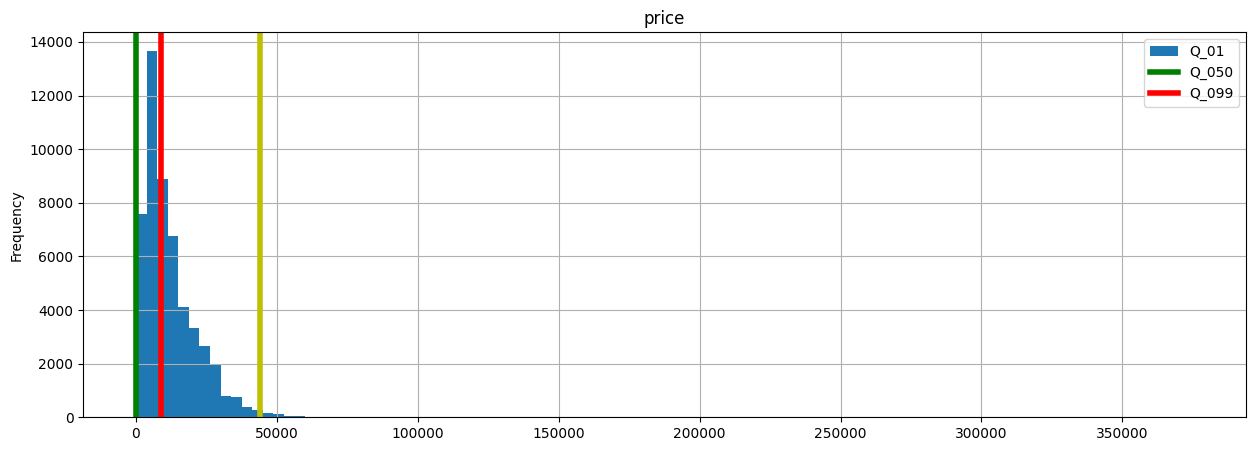

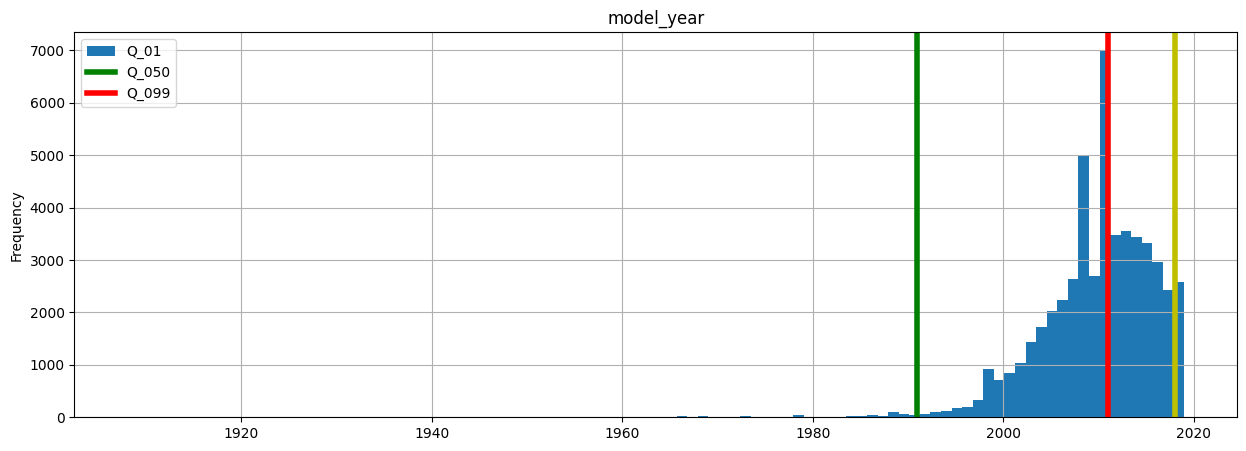

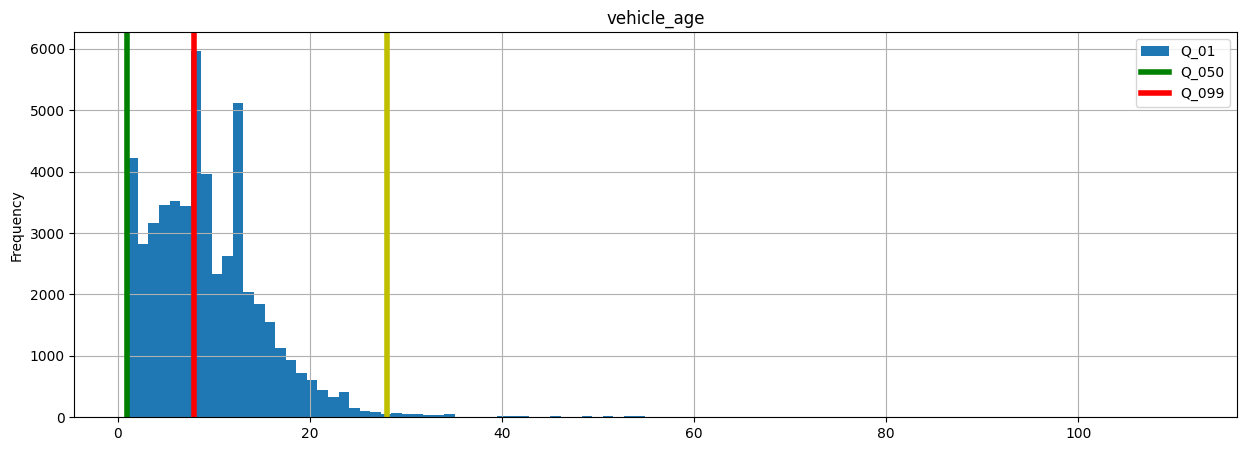

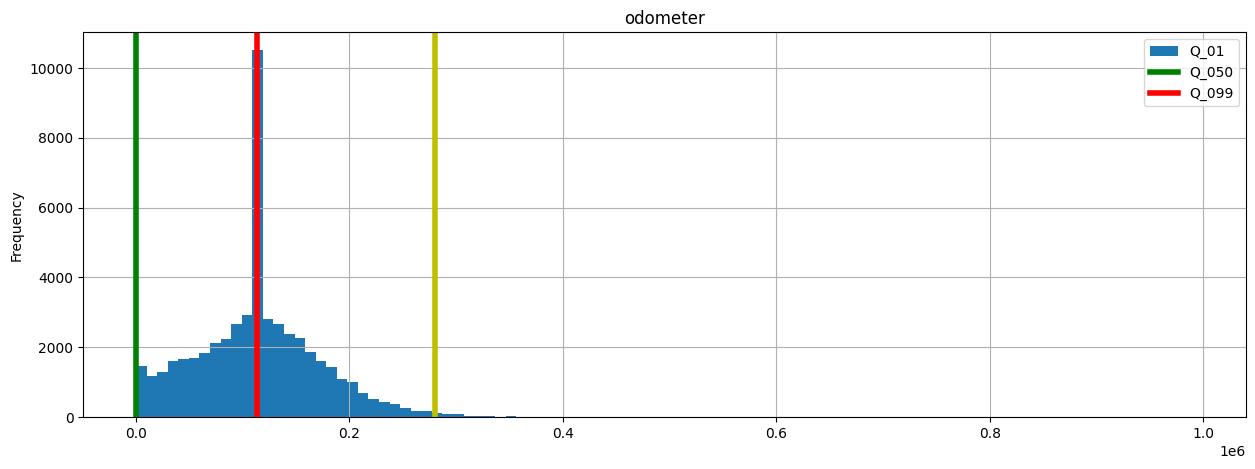

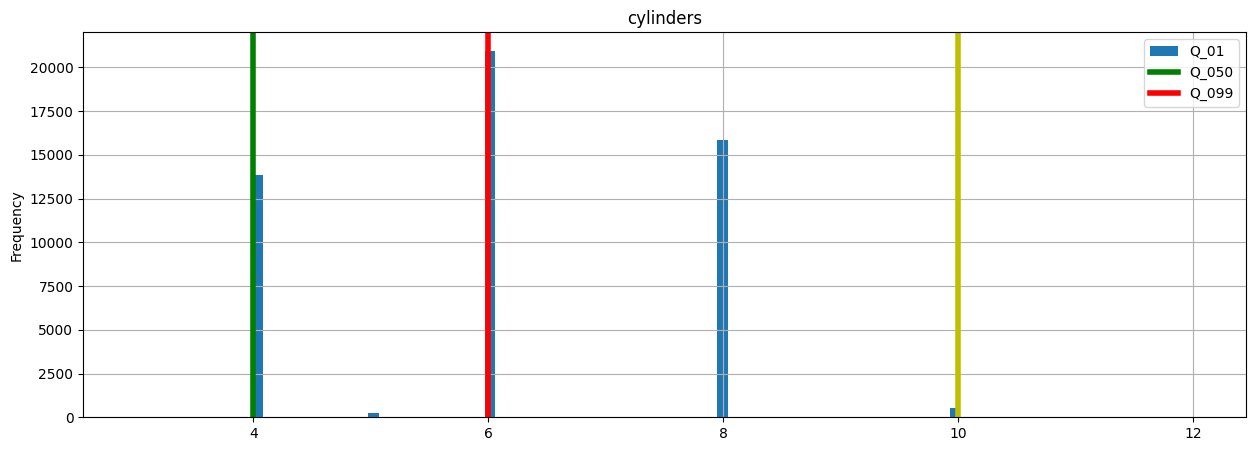

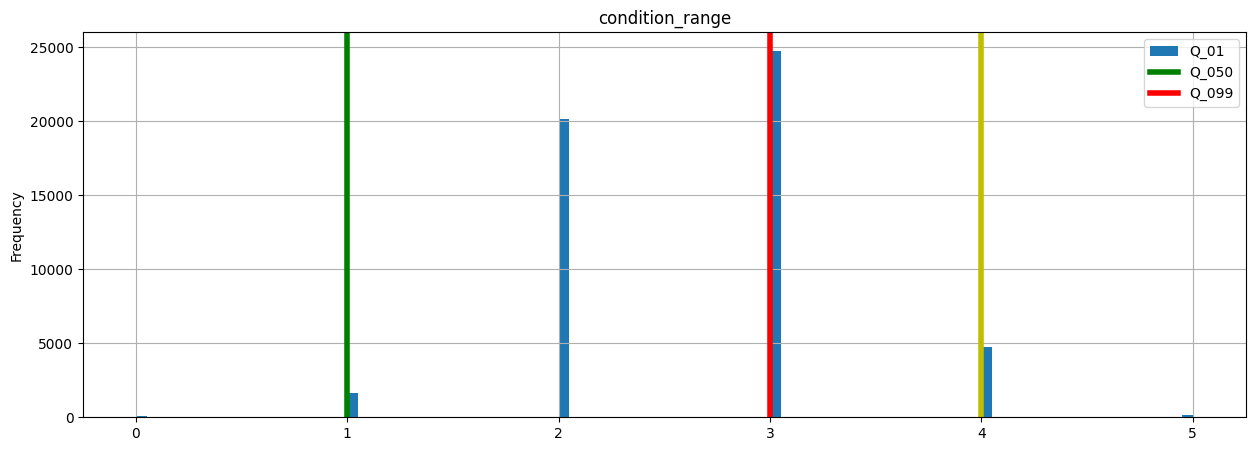

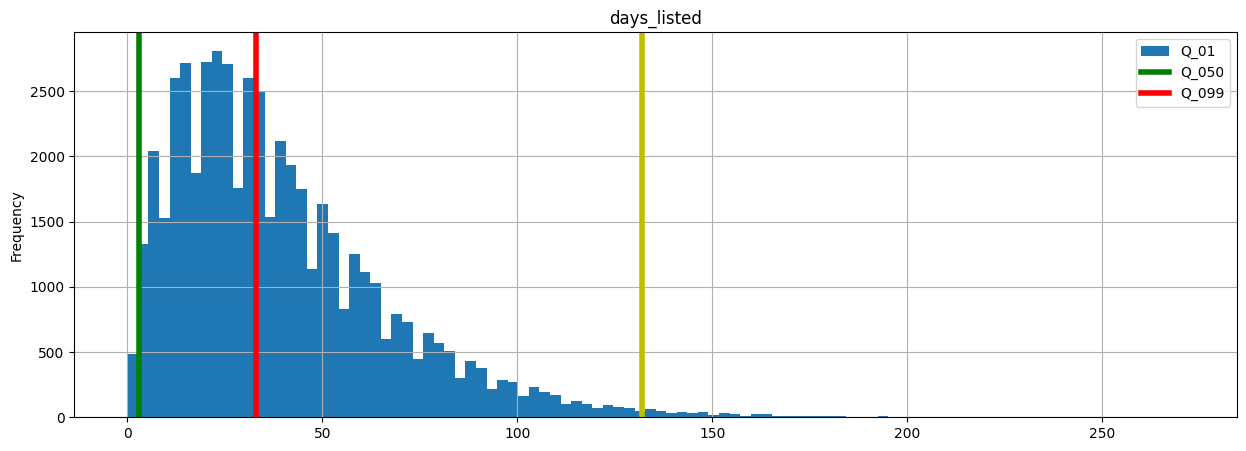

In [53]:
columns = ['price', 'model_year', 'vehicle_age', 'odometer', 'cylinders', 'condition_range', 'days_listed']

for col in columns:
    df[col].plot.hist(bins=100, grid=True, figsize=(15, 5))
    plt.title(col)
    plt.axvline(df[col].quantile(0.01), linewidth=4, color = 'g')
    plt.axvline(df[col].quantile(0.50), linewidth=4, color = 'r')
    plt.axvline(df[col].quantile(0.99), linewidth=4, color='y')
    plt.legend(["Q_01", "Q_050", "Q_099"])
    plt.show() 


### **Observaciones histograms**
<br>En los 7 histogramas se hace evidente que tenemos valores atípicos en todos ellos. En términos de precio, antigüedad del vehículo y días enumerados, vemos la mayoría de los valores agrupados al comienzo del gráfico. En relación al año del modelo, tenemos la mayoría de los valores agrupados al final del gráfico. En el cuentakilómetros hay un valor sensiblemente superior al resto de valores. Para cilindros y condición, algunos valores tienen una cantidad significativamente mayor que otros.
A continuación investigaré cómo tratar estos valores.

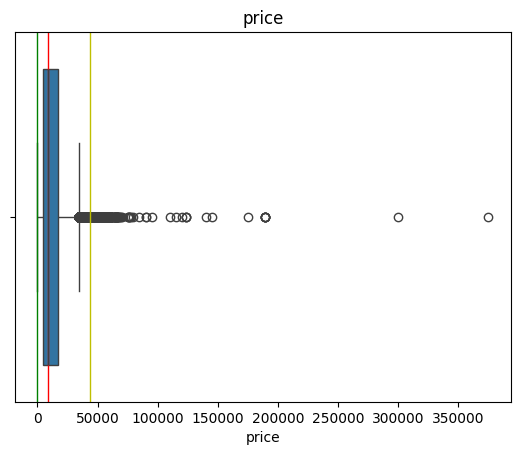

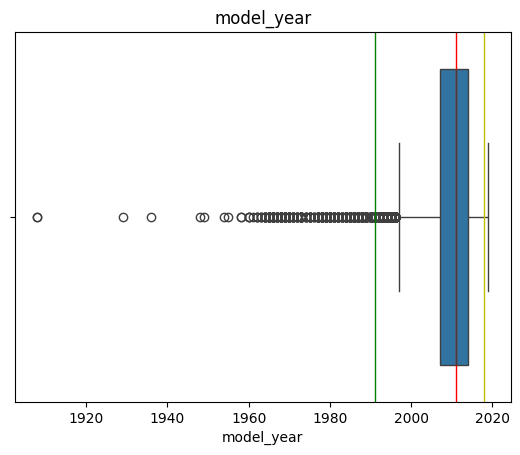

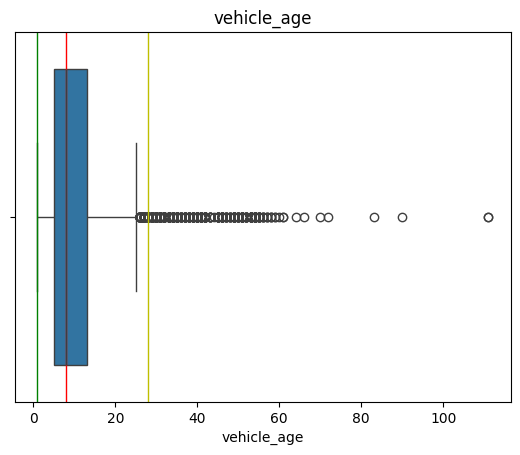

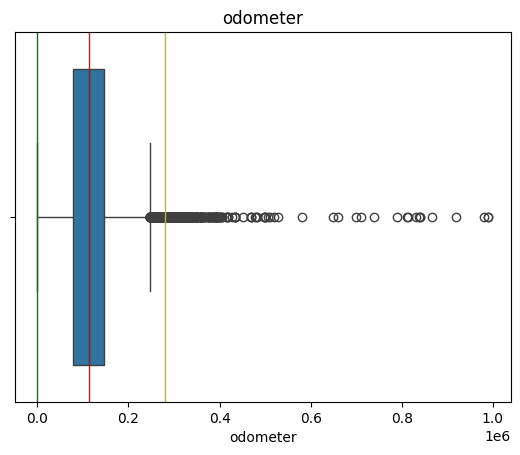

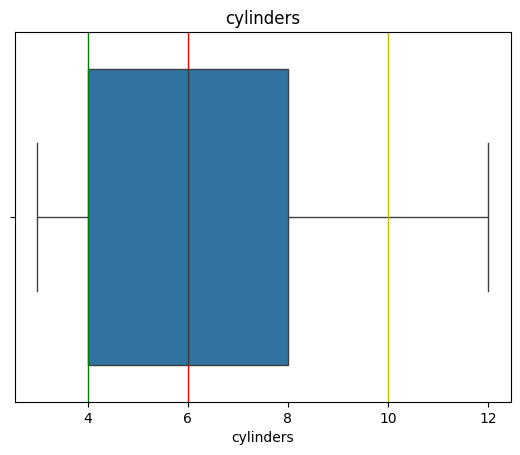

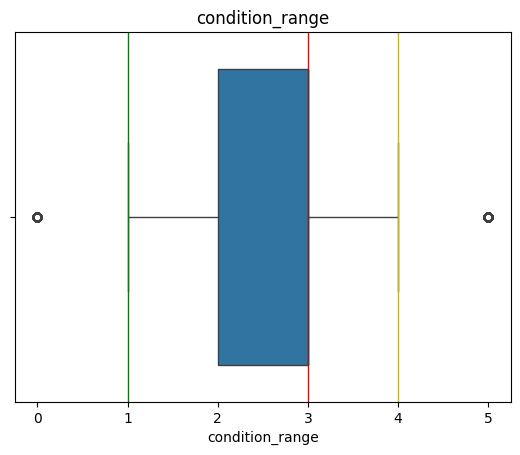

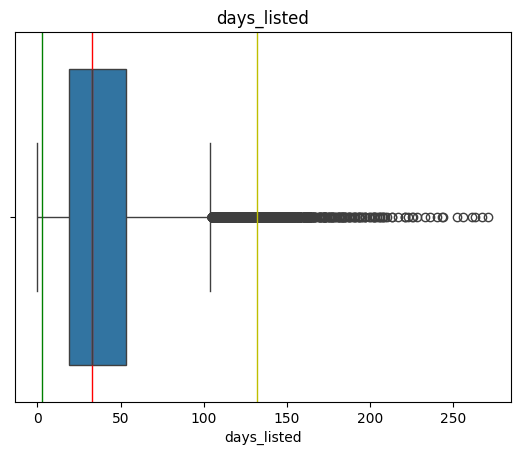

In [54]:
columns = ['price', 'model_year', 'vehicle_age', 'odometer', 'cylinders', 'condition_range', 'days_listed']
    
for col in columns:
    sns.boxplot(data=df, x=col)
    plt.title(col)
    plt.axvline(df[col].quantile(0.01), linewidth=1, color = 'g')
    plt.axvline(df[col].quantile(0.50), linewidth=1, color = 'r')
    plt.axvline(df[col].quantile(0.99), linewidth=1, color='y')
    plt.show() 

### **Observaciones box plots**
<br>Los diagramas de caja colaboran con los histogramas que muestran la misma tendencia. Tenemos algunos valores atípicos que tendremos que tratar. Esto se hará en los **próximos pasos**

## Estudiar y tratar valores atípicos
***

Crearé funciones para calcular los valores atípicos y eliminarlos.


In [55]:
columns = ['price', 'model_year', 'vehicle_age', 'odometer', 'days_listed']
    
df_clean = df.copy()

def clean_outliers(column):
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1 
        lower_lim = Q1 - IQR * 1.5
        higher_lim = Q3 + IQR * 1.5
        if lower_lim < 0:
            lower_lim = df_clean[column].min()
        df_filtered = df_clean[(df_clean[column] >= lower_lim) & (df_clean[column] <= higher_lim)] 
        
        return df_filtered
           
for column in columns:
    df_clean = clean_outliers(column)

## Estudiar parámetros principales sin valores atípicos
***

Para mostrar que los valores atípicos se han filtrado de manera efectiva del DataFrame, voy a llamar a los histogramas y diagramas de caja nuevamente


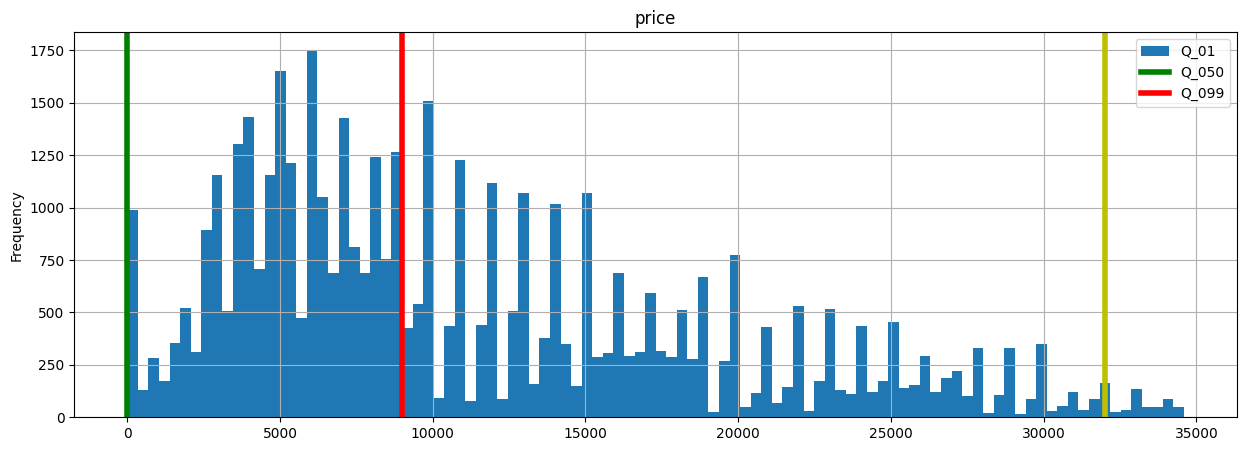

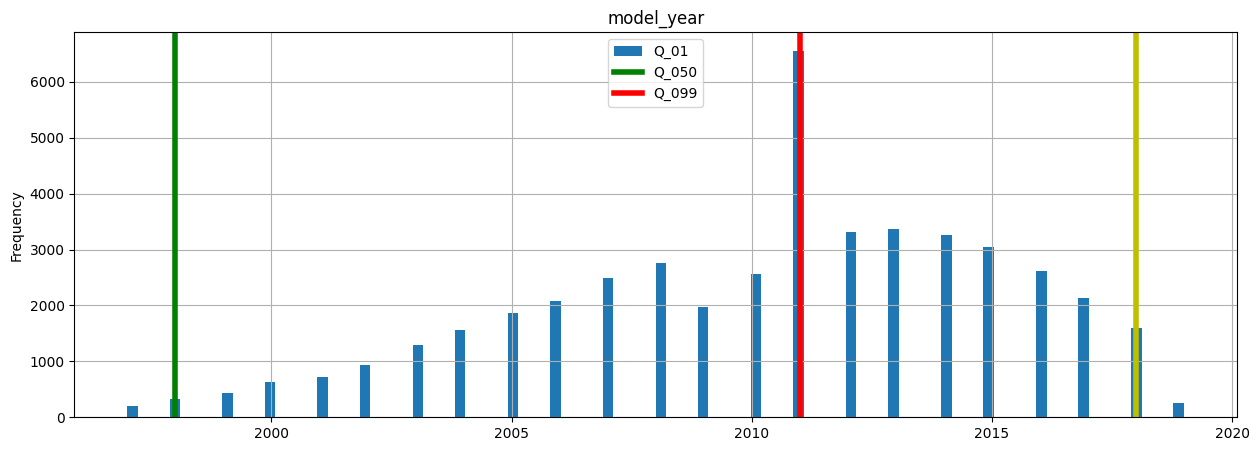

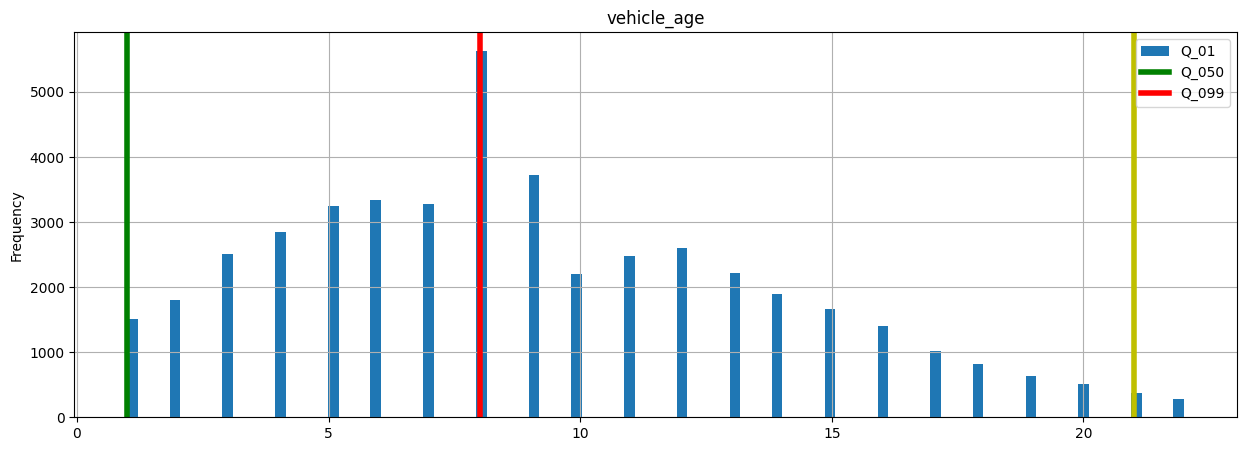

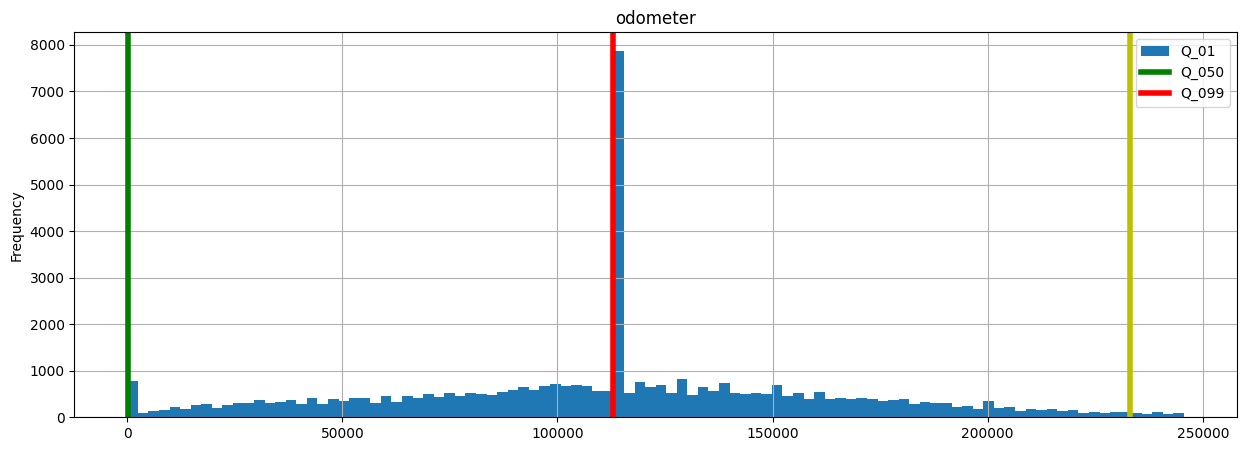

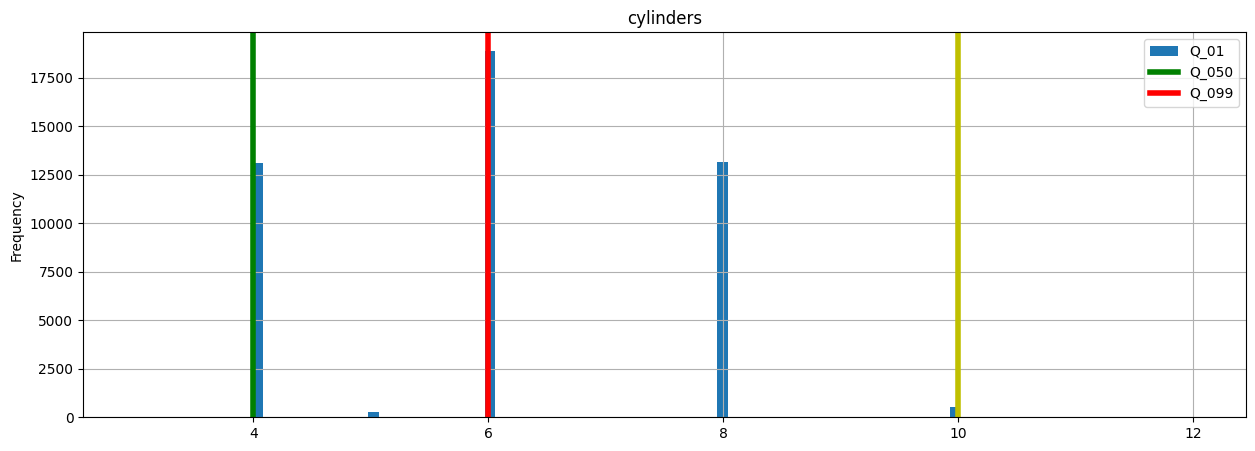

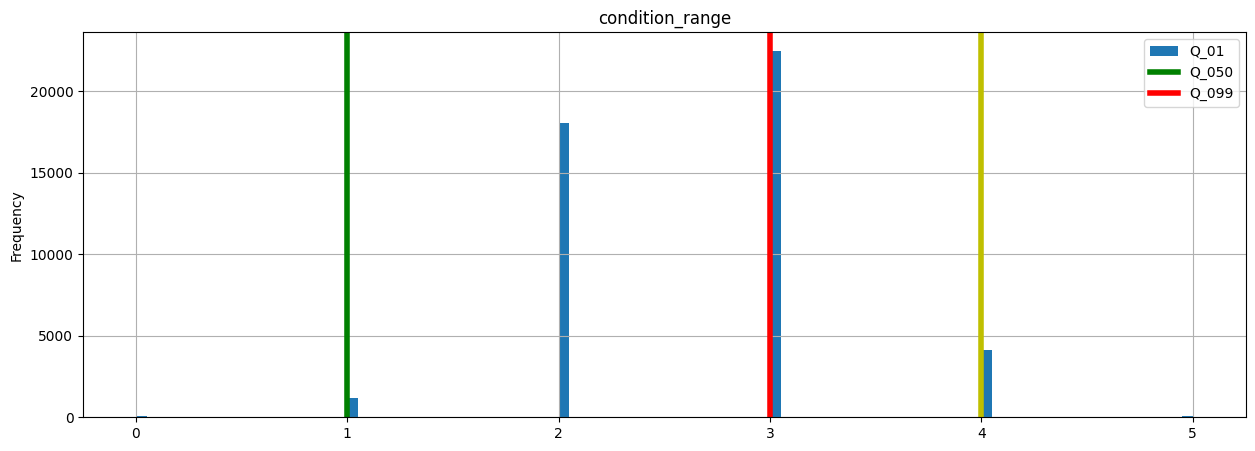

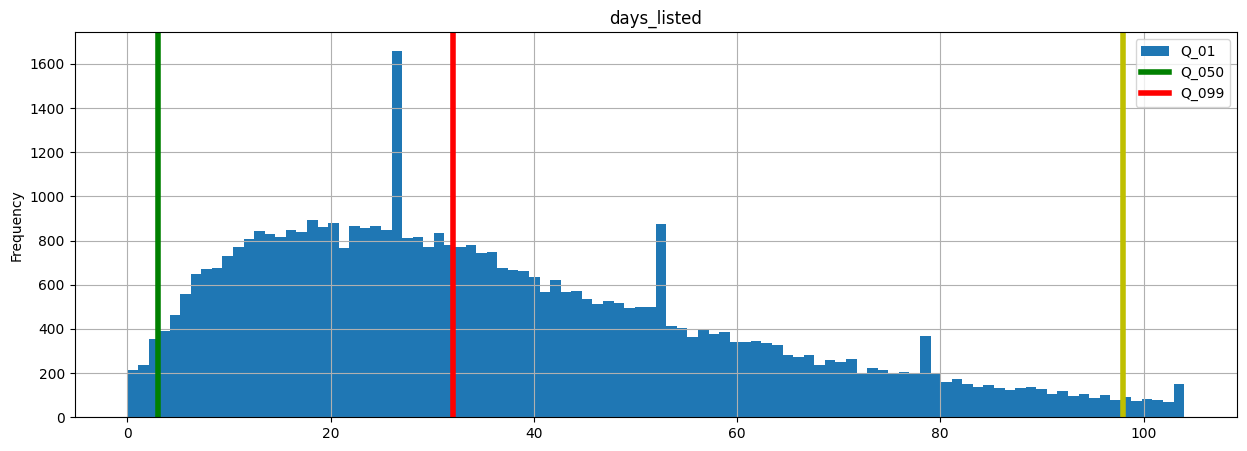

In [56]:
columns = ['price', 'model_year', 'vehicle_age', 'odometer', 'cylinders', 'condition_range', 'days_listed']

for col in columns:
    df_clean[col].plot.hist(bins=100, grid=True, figsize=(15, 5))
    plt.title(col)
    plt.axvline(df_clean[col].quantile(0.01), linewidth=4, color = 'g')
    plt.axvline(df_clean[col].quantile(0.50), linewidth=4, color = 'r')
    plt.axvline(df_clean[col].quantile(0.99), linewidth=4, color='y')
    plt.legend(["Q_01", "Q_050", "Q_099"])
    plt.show() 

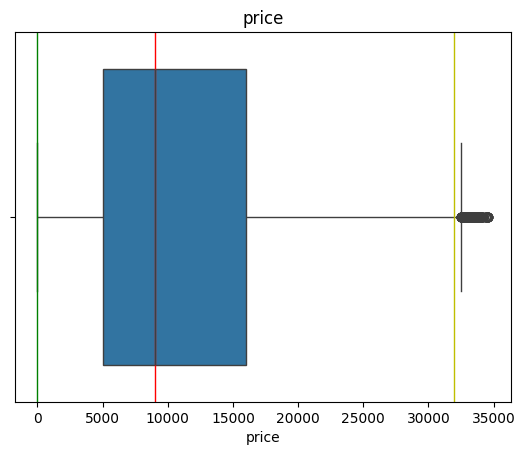

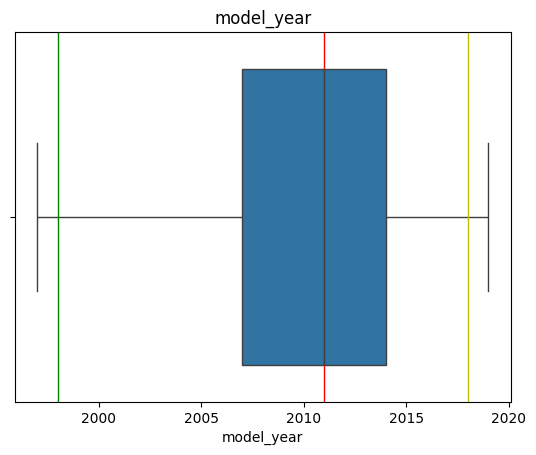

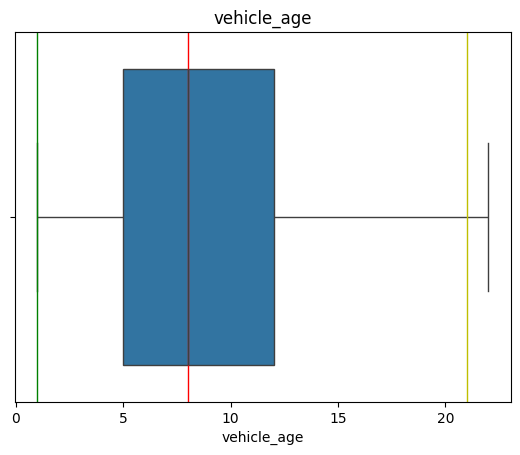

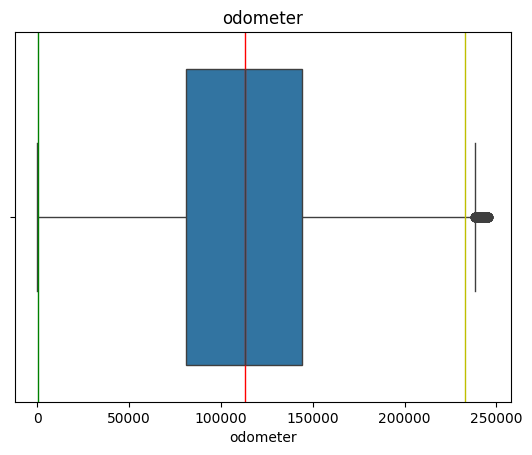

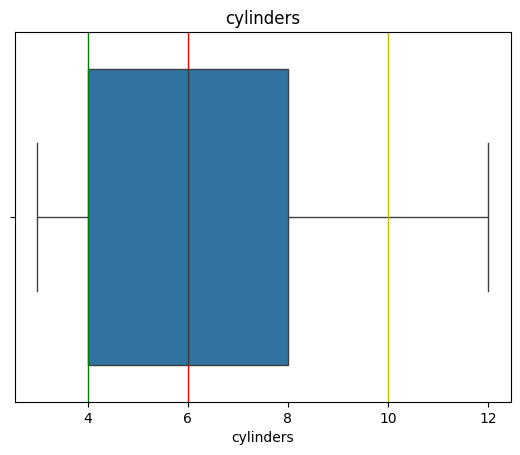

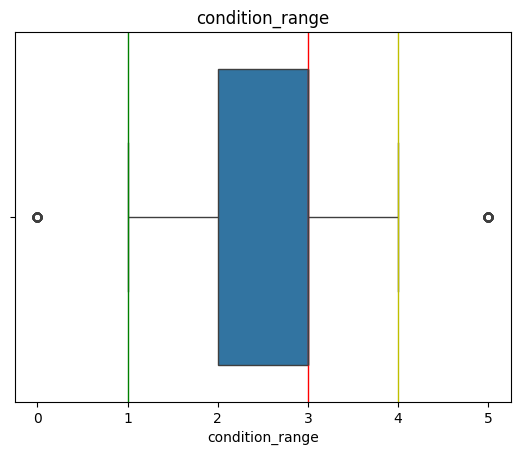

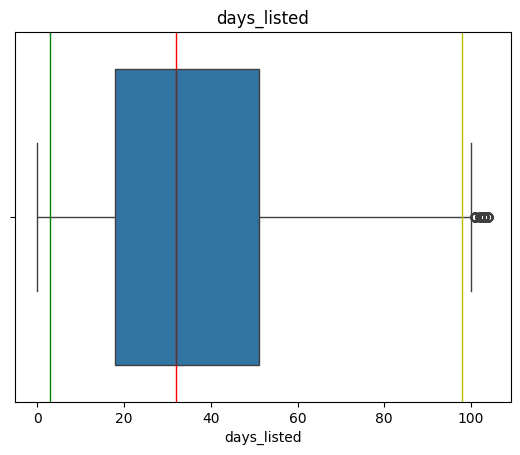

In [57]:
columns = ['price', 'model_year', 'vehicle_age', 'odometer', 'cylinders', 'condition_range', 'days_listed']
    
for col in columns:
    sns.boxplot(data=df_clean, x=col)
    plt.title(col)
    plt.axvline(df_clean[col].quantile(0.01), linewidth=1, color = 'g')
    plt.axvline(df_clean[col].quantile(0.50), linewidth=1, color = 'r')
    plt.axvline(df_clean[col].quantile(0.99), linewidth=1, color='y')
    plt.show()  

#  The exploratory data analysis

## Periodo de colocación de los anuncios

Conozca cuántos días se mostró el anuncio en days_listed. Describa cuánto tiempo generalmente se muestra un anuncio. Decida cuándo los anuncios se eliminan rápidamente y cuándo se muestran durante mucho tiempo.


Esta es la distribución de datos de cuánto tiempo se mostró un anuncio en el sitio web


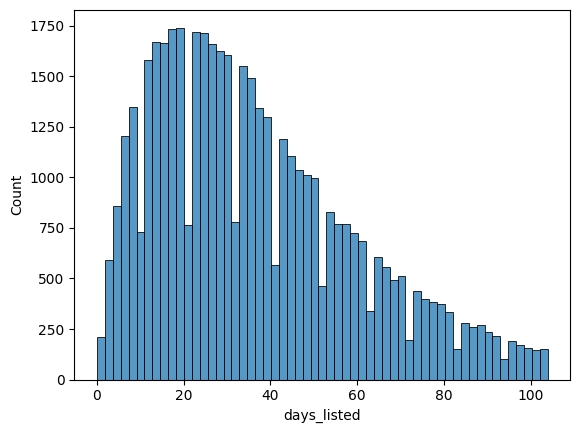

In [58]:
sns.histplot(data=df_clean, x='days_listed')
print('Esta es la distribución de datos de cuánto tiempo se mostró un anuncio en el sitio web')
plt.show()

In [59]:

print('En promedio, un anuncio se mostró durante ',df_clean['days_listed'].mean().round(2), 'dias')
print('Las medianas son',df_clean['days_listed'].median().round(2), 'dias')
print('El menor tiempo que tardó en mostrarse un anuncio es', df_clean['days_listed'].min(), 'dias')
print('y el tiempo mas largo es', df_clean['days_listed'].max(), 'dias')

En promedio, un anuncio se mostró durante  36.67 dias
Las medianas son 32.0 dias
El menor tiempo que tardó en mostrarse un anuncio es 0 dias
y el tiempo mas largo es 104 dias


C:\Users\bokol\AppData\Local\Temp\ipykernel_27936\482776536.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  _ = sns.countplot(x=df_clean["year_posted"],palette='mako')


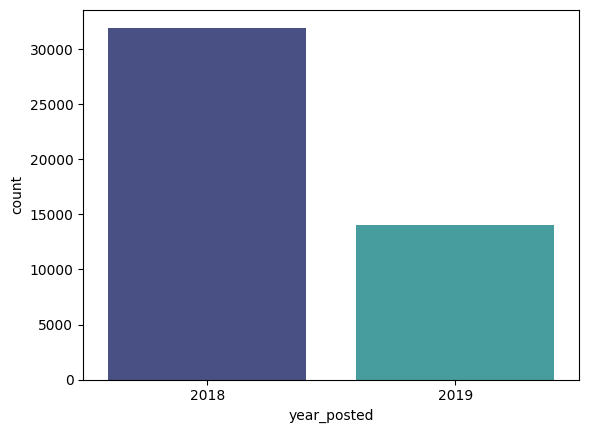

In [60]:
_ = sns.countplot(x=df_clean["year_posted"],palette='mako')

La mayoría de los anuncios se publicaron en 2018 y el resto apareció al año siguiente.

C:\Users\bokol\AppData\Local\Temp\ipykernel_27936\2310961749.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  _ = sns.countplot(x=df_clean["month_posted"], palette='mako')


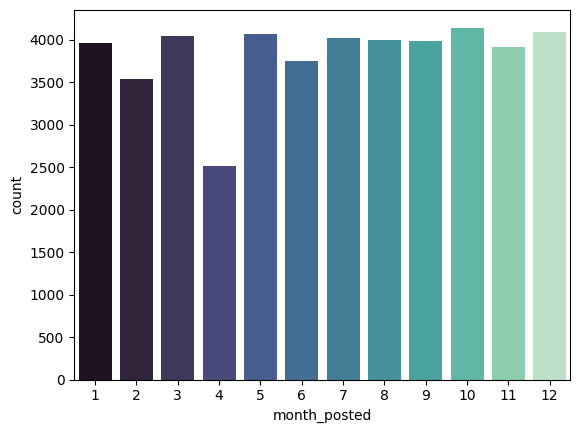

In [61]:
_ = sns.countplot(x=df_clean["month_posted"], palette='mako')

Octubre es el mes más popular para que los vendedores coloquen anuncios, mientras que abril es el menos popular. La cantidad de anuncios distribuidos cada mes es constante.


C:\Users\bokol\AppData\Local\Temp\ipykernel_27936\203725049.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  _ = sns.countplot(x=df_clean["day_of_week_posted"], palette='mako')


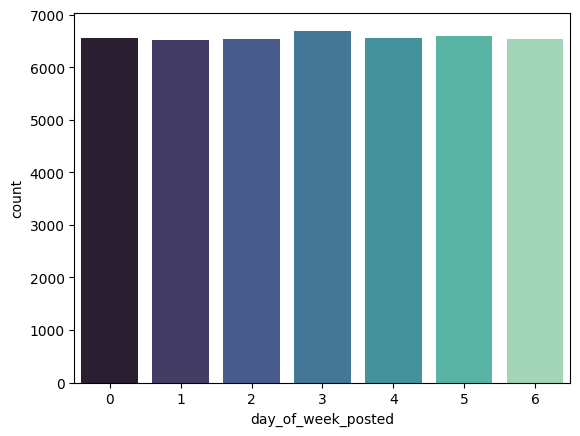

In [62]:
_ = sns.countplot(x=df_clean["day_of_week_posted"], palette='mako')

No hay un día preferido para publicar anuncios. Todos los días de la semana se distribuyen uniformemente.

## Precio promedio por cada tipo de vehículo

En esta sección voy a analizar el número de anuncios y el precio medio de cada tipo de vehículo. Dibujaré un gráfico que muestre la dependencia del número de anuncios en cada tipo de vehículo y luego seleccionaré los tres tipos con el mayor número de anuncios.
<br>
<br> Comparando el número de anuncios y el precio medio de cada tipo de vehículo. Podemos crear un gráfico que represente la relación entre la cantidad de anuncios y los tipos de vehículos. Elegiremos los tres tipos con más anuncios.


C:\Users\bokol\AppData\Local\Temp\ipykernel_27936\3666383392.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  _ = sns.barplot(data=type_pivot,x='ad_counts', y='type', palette='mako')


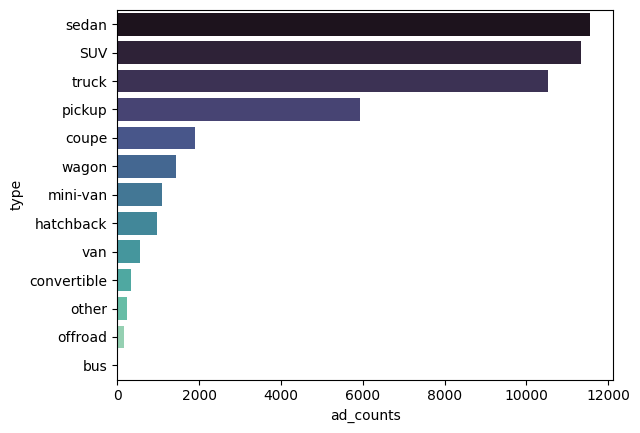

In [63]:
type_pivot = df_clean.pivot_table(index='type', values='price', aggfunc =['count', 'mean'])
type_pivot.columns = ['ad_counts', 'avg_price']
type_pivot['type'] = type_pivot.index
type_pivot = type_pivot.sort_values(by='ad_counts', ascending=False)

_ = sns.barplot(data=type_pivot,x='ad_counts', y='type', palette='mako')

C:\Users\bokol\AppData\Local\Temp\ipykernel_27936\3447856828.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  _ = sns.barplot(data=type_pivot,x='avg_price', y='type', palette='mako')


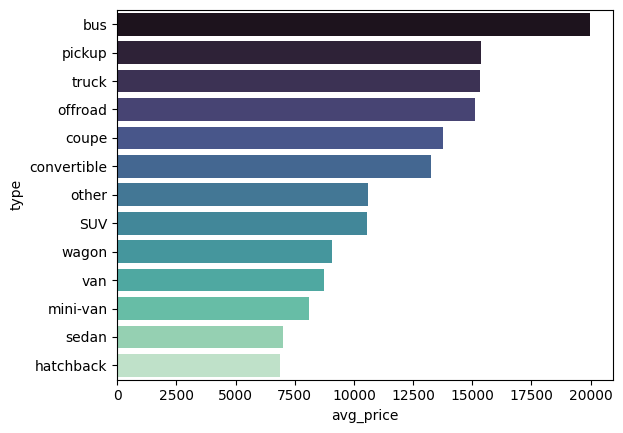

In [64]:
type_pivot = type_pivot.sort_values(by='avg_price', ascending=False)

_ = sns.barplot(data=type_pivot,x='avg_price', y='type', palette='mako')


Para la siguiente sección, eliminaremos otro tipo de vehículo a excepción de los SUV, camionetas y sedán. Usando el gráfico, identifiqué SUV, camión y sedán como los mejores vehículos. Estos son los tipos que usaré en mi análisis continuo.
En los **próximos pasos**, voy a crear un filtro que filtrará todos los demás tipos.


In [65]:
selected_type = ['SUV', 'truck', 'sedan']
filtered_df = df_clean[['type','price','days_listed','vehicle_age','mileage_per_year','condition_range','cylinders','fuel','transmission','paint_color',]].copy()
filtered_df = filtered_df.query('type == @selected_type')


## Factores de precio

¿Cuáles son los factores que más afectan el precio? Echaré un vistazo más de cerca a cada uno de los tipos que identifiqué antes para ver si el precio depende de factores como la edad, el kilometraje, el estado, el tipo de transmisión y el color. Haré esto usando una combinación de **histogramas, diagramas de caja y bigotes y diagramas de dispersión**


In [66]:
filtered_df.corr(numeric_only=True) 


,price,days_listed,vehicle_age,mileage_per_year,condition_range,cylinders
price,1.000000,0.000540,-0.470654,0.201568,0.191315,0.293325
days_listed,0.000540,1.000000,0.007860,-0.008496,-0.002176,0.006774
vehicle_age,-0.470654,0.007860,1.000000,-0.491419,-0.292010,0.153948
mileage_per_year,0.201568,-0.008496,-0.491419,1.000000,0.081043,-0.032909
condition_range,0.191315,-0.002176,-0.292010,0.081043,1.000000,-0.088770
cylinders,0.293325,0.006774,0.153948,-0.032909,-0.088770,1.000000


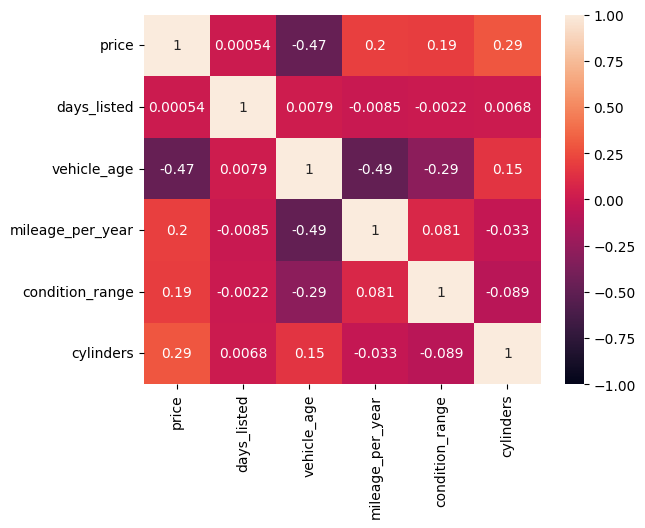

In [67]:
_ = sns.heatmap(filtered_df.corr(numeric_only=True) ,vmin = -1, vmax=1, annot=True)

El mapa de calor creado anteriormente muestra una correlación negativa moderada entre el precio y la edad de un vehículo. Esto parece bastante lógico, ya que los compradores de automóviles suelen pagar más por un automóvil nuevo que por uno antiguo. Sin embargo, en cierto punto, la edad de un automóvil cambiará el impacto de un automóvil, ya que un automóvil antiguo en buenas condiciones en algunos casos puede valer más que un automóvil nuevo.
 
Tanto la condición como los cilindros muestran una correlación ligeramente positiva, más cercana a 0,25. A medida que mejora la condición, también lo hace el precio, y tener más cilindros indica un automóvil más rápido, lo que podría explicar el aumento en el precio.

Sorprendentemente, el precio aumenta a medida que aumenta la cantidad de millas recorridas por año. Aunque el valor de la correlación no es significativo (0,25), sigue siendo interesante encontrar que los coches más aventureros se cotizan a precios más altos que aquellos cuyos propietarios pasan más tiempo en el garaje. Esto explica por qué las relaciones y la correlación no siempre significan causalidad.

### Vehicle Age
***
 
A medida que vamos entrando en más detalles sobre cada variable. Podemos ver que la correlación de estas variables con el precio de cada tipo de vehículo es diferente. En el primer caso, Camioneta tiene una pendiente más pronunciada, lo que muestra una mayor correlación que sedán


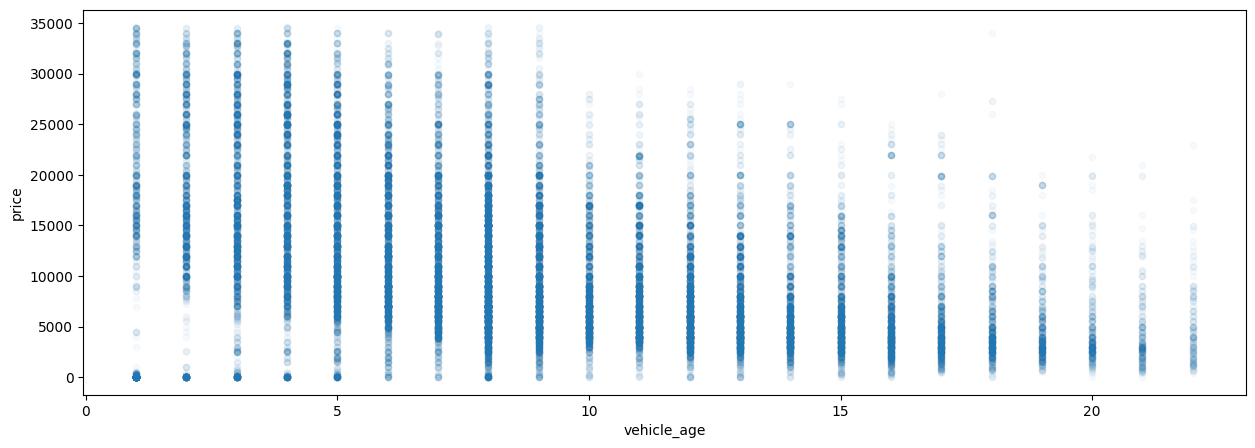

In [68]:
_= filtered_df.plot(x='vehicle_age', y='price', kind='scatter', figsize=(15, 5), alpha=0.03)

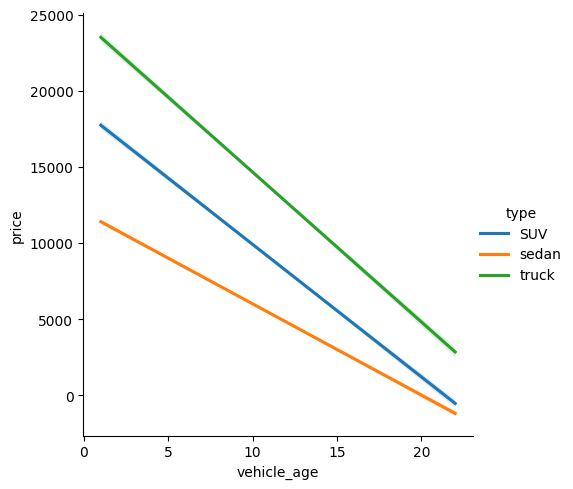

In [69]:
_ = sns.lmplot(data=filtered_df, x="vehicle_age", y="price", hue="type", scatter=False)

Los dos gráficos anteriores muestran una correlación. Es seguro decir que existe una correlación entre el precio de un automóvil y su antigüedad..

### Mileage per Year
***

En la siguiente variable, podemos ver que las camionetas y los SUV tienen casi la misma pendiente, siendo el precio promedio de las camionetas más alto.


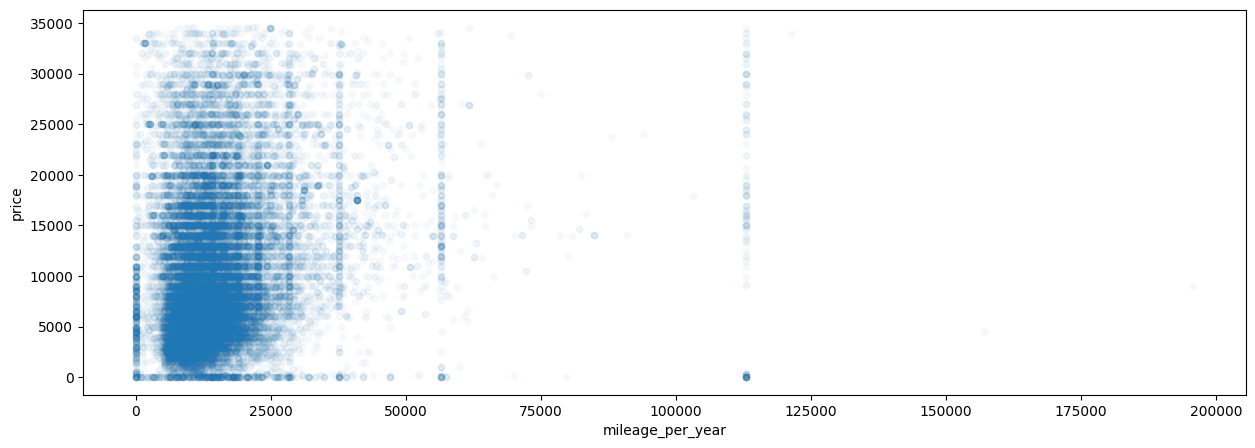

In [70]:
_= filtered_df.plot(x='mileage_per_year', y='price', kind='scatter', figsize=(15, 5), alpha=0.03)


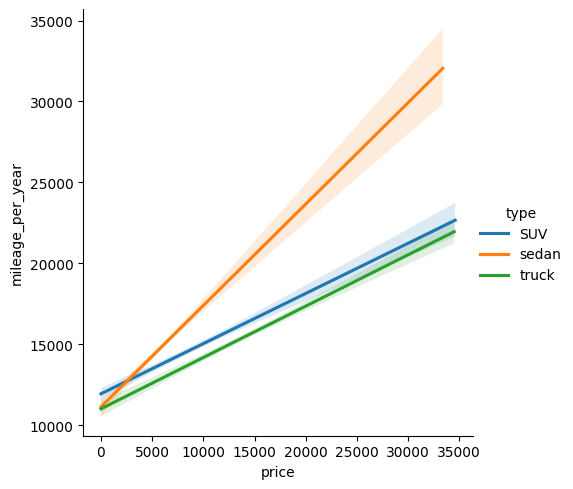

In [71]:
_ = sns.lmplot(data=filtered_df, x="price", y="mileage_per_year", hue="type", scatter=False)

Los dos gráficos anteriores muestran una correlación. Es seguro decir que existe una correlación entre el precio de un automóvil y su milaje.

### Condition
***
 
The same can be said for condition variables

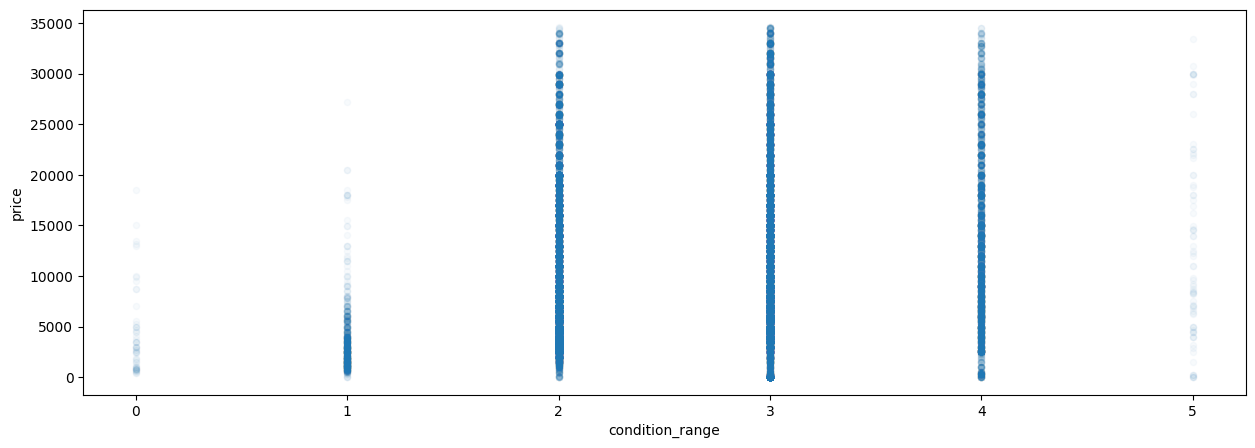

In [72]:
_= filtered_df.plot(x='condition_range', y='price', kind='scatter', figsize=(15, 5), alpha=0.03)


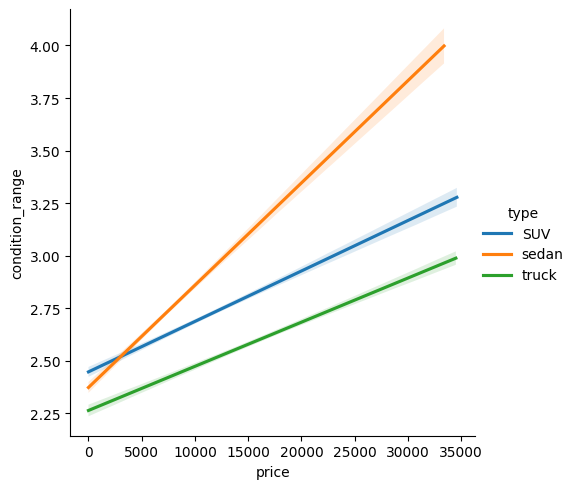

In [73]:
_ = sns.lmplot(data=filtered_df, x="price", y="condition_range", hue="type", scatter=False)

Una vez más, pero no es sorprendente, existe una clara correlación en la que cuanto mejor es el estado de un automóvil, mayor es el precio.

### Cylinders
***

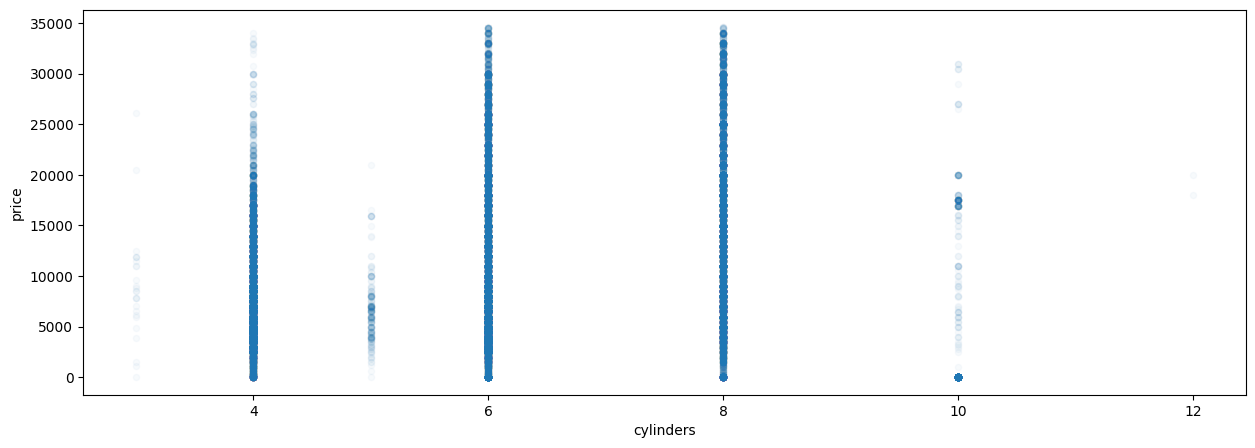

In [74]:
_= filtered_df.plot(x='cylinders', y='price', kind='scatter', figsize=(15, 5), alpha=0.03)

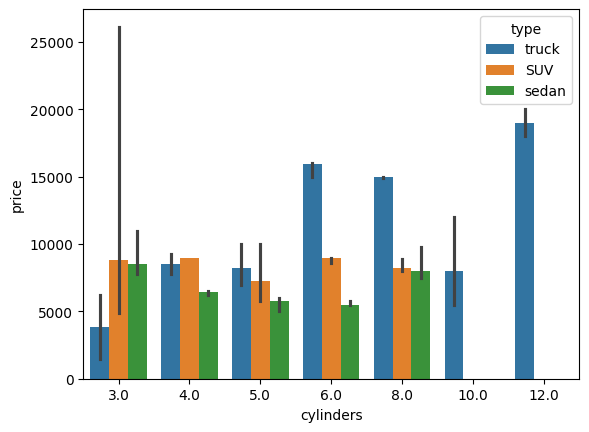

In [75]:
_ = sns.barplot(data=filtered_df, x="cylinders", y="price", hue="type", estimator=np.median)

La cantidad de cilindros parece tener impacto solo en los camiones, donde esta categoría muestra un aumento en el precio de 6, 8, 10 y 12 cilindros, mientras que las otras dos categorías no muestran una correlación significativa entre el precio y la cantidad de cilindros.

### Fuel type
***
 
No podemos adquirir el valor de correlación para tipos de datos categóricos como la columna de combustible. Como resultado, el empleo de diagramas de barras hará que sea más fácil de visualizar. El gráfico muestra que los vehículos que utilizan diesel tienen un precio promedio más alto que otras formas de combustible.


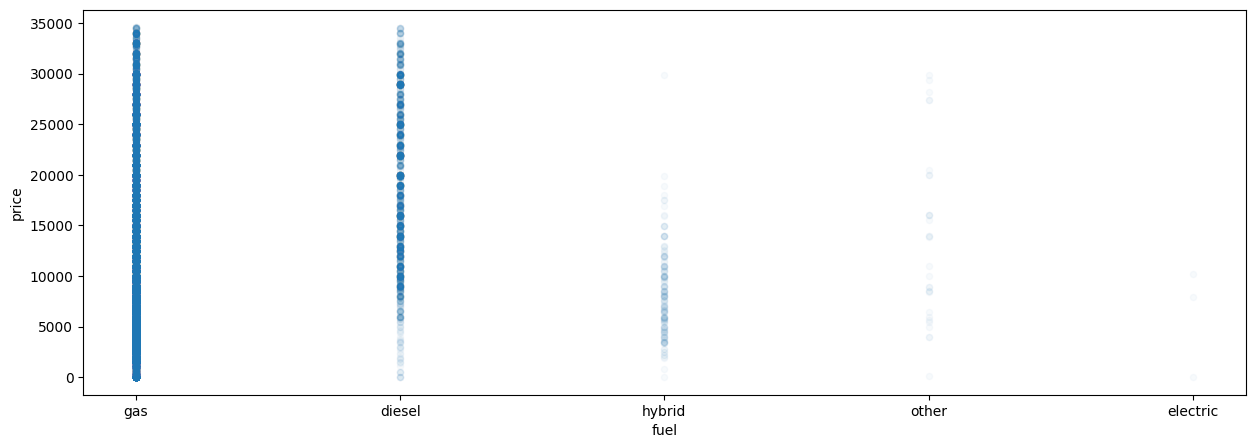

In [76]:
_ = filtered_df.plot(x='fuel', y='price', kind='scatter', figsize=(15, 5), alpha=0.03)

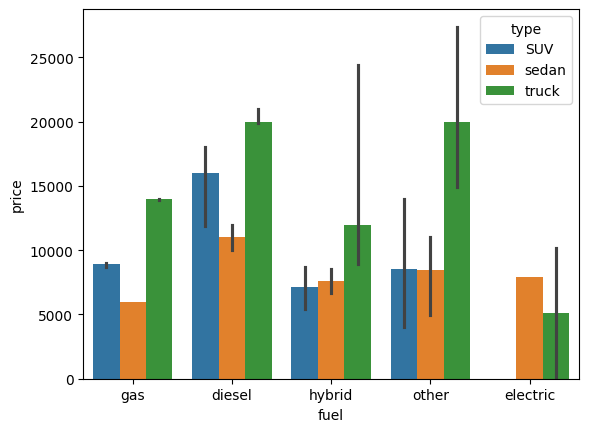

In [77]:
_ = sns.barplot(data=filtered_df, x="fuel", y="price", hue="type", estimator=np.median)

### Transmission
***
 
Sedan y Truck son más caros cuando tienen transmisión automática, mientras que los SUV manuales cuestan más.


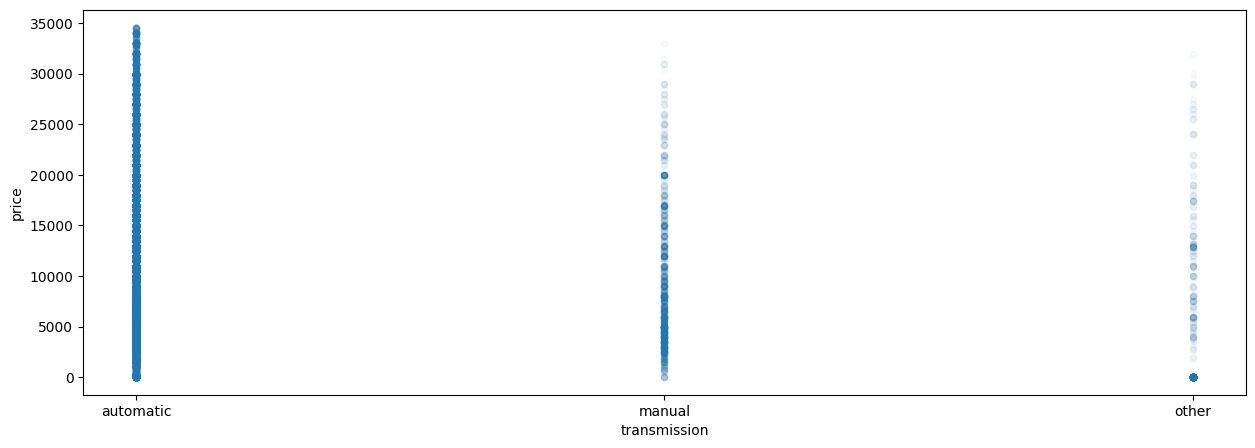

In [78]:
_ = filtered_df.plot(x='transmission', y='price', kind='scatter', figsize=(15, 5), alpha=0.03)

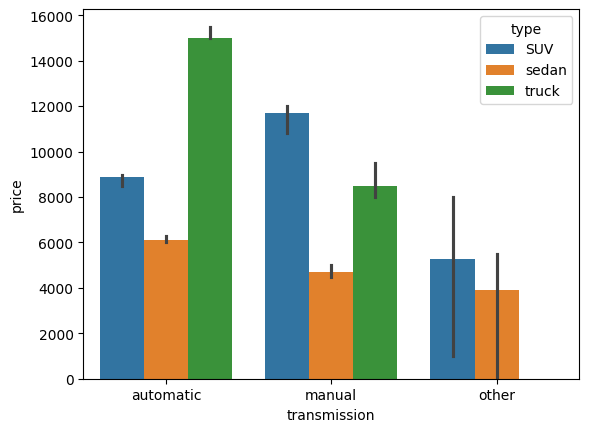

In [79]:
_ = sns.barplot(data=filtered_df, x="transmission", y="price", hue="type", estimator=np.median)


### Paint Color
***
 
El amarillo resulta ser el color más caro entre otros, mientras que el morado es el que menos. Los colores comunes de los vehículos, como el negro, el blanco y el plateado, tienen precios moderados.


C:\Users\bokol\AppData\Local\Temp\ipykernel_27936\2384154285.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  _ = sns.barplot(data=filtered_df, x="price", y="paint_color", estimator=np.median, palette='mako')


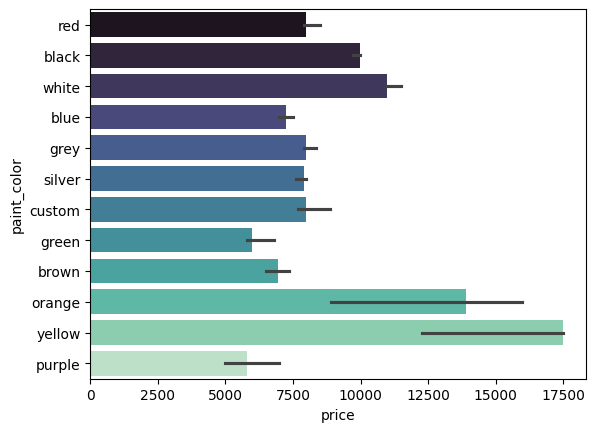

In [83]:
_ = sns.barplot(data=filtered_df, x="price", y="paint_color", estimator=np.median, palette='mako')

# Conclusión general

El DataFrame original constaba de **51525 filas y 13 columnas**. Durante la primera parte del análisis tuve que identificar y corregir **Valores ausentes** y **Valores atípicos**.
 
* **Valores ausentes -** Encontré 5 columnas con valores de NaN que tuve que investigar y tratar. Las siguientes columnas tenían valores NaN: model_year, cylinders, odometer, paint_color e is_4wd. La cantidad de valores de NaN en las columnas no parece presentar ningún patrón. Solo en is_4wd pude establecer la razón exacta. La columna constaba de **1 valores** y 
    * **valores NaN** y llegué a la conclusión de que estos eran valores **bolean** donde los valores 1 equivalían a **Verdadero** mientras que NaN equivalía a **Falso** . Corregí esto reemplazando NaN con 0. Para el resto de las columnas, traté de encontrar correlaciones que me permitieran unir y agrupar con otras columnas para reemplazar los valores faltantes.
 
* **Valores atípicos -** Luego tuve que lidiar con valores atípicos. Aquí encontré solo un problema.
     * **Dtype -** Los valores en la columna **date_posted** se agregaron originalmente como objetos. Ordené esto convirtiendo todos los valores al formato DateTime.
 
* **Enriquecer datos -** Para realizar el análisis más preciso, tuve que enriquecer los datos en el DataFrame, donde me concentré principalmente en tres áreas:
    * **Fecha -** Agregué tres columnas al DataFrame donde extraje el día de la semana, el mes y el año en que se listaba un listado.
    * **Antiguadad del vehículo -** Agregué una columna que muestra la edad de un vehículo contratando el año en que se publicó el listado y la edad del vehículo.
    * **Kilometraje promedio -** Creé una columna que contiene el kilometraje promedio al dividir el kilometraje con la edad del vehículo.
    * **Condition_range -** Por último, creé una columna para convertir la condición de la columna categórica en valores numéricos en la columna condition_range.
* **Outliers -** Cuando se limpiaron todos los datos, salté a trabajar en los valores atípicos. Aquí me enfoqué especialmente en las columnas: precio, días_listados, kilometraje, cilindros y condición.
Durante esta fase, tuve que identificar los valores atípicos usando cuantiles y luego configurar filtros para asegurarme de que mi DataFrame estuviera lo más limpio posible.
 
 
**Conclusiones a la análisis**
 
¿Qué factores influyen en el precio? Podemos concluir con seguridad que numerosos factores se correlacionan tanto de forma negativa como positiva con el precio.
 
Pero antes de profundizar más en esta pregunta, echaré un vistazo a otras dos preguntas generales.
 
* ¿Qué tipos de vehículos son los más anunciados en nuestra web? <br> 
 
Los vehículos más anunciados en el sitio web son **sedán, SUV y camionetas** con un tiempo de anuncio promedio de **36,5 días**. El año con más listados fue 2018, con una cantidad anual de hasta el 70% de todos los listados en el sitio y con octubre como el mes con más listados, mientras que abril tuvo menos listados. El tipo de vehículo más caro es un autobús, mientras que el más barato es el Hatchback.
 
* ¿Qué factores contribuyen más al precio de los vehículos?<br> 
 
The age of a vehicle has a negative link with its price. The older a vehicle becomes, the lower its price.
Surprisingly, the price rises as the number of miles driven per year increases.
Conditon exhibit a slightly positive correlation, closer to a quarter. As the condition improves, so does the price.
Diesel cars are the most expensive in average among other fuel type.
Automatic cars are the most expensive in average among other transmission.
Age of vehicle has the strongest correlation among other factor.